### Importing neccessary library and `paths` and `script files `

In [174]:
%load_ext autoreload
%autoreload 2
import sys
import os
import random
import pandas as pd
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src')) 
from data_loader import FileLoader
from eda import EDA
from hypothesis_testing import HypothessTest
from Preprocessing import Preprocessing
from modeling import Modeling

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Object Instanitation

In [175]:
data_loader = FileLoader()
eda = EDA()
test = HypothessTest()
pre_pro = Preprocessing()
model = Modeling()

### Call methods for reading `text` data in `dataframe`

In [ ]:
df, df2 = data_loader.lead_text_files()

### Call methods for saving converted `text` data in `dataframe` to `csv`

In [3]:
data_loader.save_csv_file(df)

### Call methods for reading this `csv` data 

In [146]:
df = data_loader.read_csv_file()

In [101]:
df.select_dtypes(include='number').isna().sum()

UnderwrittenCoverID         0
PolicyID                    0
PostalCode                  0
mmcode                      0
RegistrationYear            0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
NumberOfDoors               0
CustomValueEstimate         0
SumInsured                  0
CalculatedPremiumPerTerm    0
TotalPremium                0
TotalClaims                 0
dtype: int64

In [102]:
numeric_columns = df.select_dtypes(include='number')
# Run T-test for numerical features
numerical_results = test.t_test(df, 'TotalClaims', numeric_columns)
print("\nT-Test Results (Numerical Features):")
for feature, result in numerical_results.items():
    print(f"{feature}: T-Statistic = {result['T-Statistic']}, P-Value = {result['P-Value']}")

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_3_V1\scripts\hypothesis_testing.py:62: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = stats.ttest_ind(group1, group2)



T-Test Results (Numerical Features):
UnderwrittenCoverID: T-Statistic = nan, P-Value = nan
PolicyID: T-Statistic = nan, P-Value = nan
PostalCode: T-Statistic = nan, P-Value = nan
mmcode: T-Statistic = nan, P-Value = nan
RegistrationYear: T-Statistic = nan, P-Value = nan
Cylinders: T-Statistic = nan, P-Value = nan
cubiccapacity: T-Statistic = nan, P-Value = nan
kilowatts: T-Statistic = nan, P-Value = nan
NumberOfDoors: T-Statistic = nan, P-Value = nan
CustomValueEstimate: T-Statistic = nan, P-Value = nan
SumInsured: T-Statistic = nan, P-Value = nan
CalculatedPremiumPerTerm: T-Statistic = nan, P-Value = nan
TotalPremium: T-Statistic = nan, P-Value = nan
TotalClaims: T-Statistic = nan, P-Value = nan


In [7]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')>

### Check top 5 values 

In [4]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


# Data Summarization

### Descriptive Statistics: Calculate the variability for numerical features such as TotalPremium, TotalClaim, etc.

### Statistical distribution of attribuets

In [6]:
df.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


### Data Structure: Review the dtype of each column to confirm if categorical variables, dates, etc. are properly formatted.

### Check attribute information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

['IsVATRegistered'] is `boolian`

['mmcode', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors',
       'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured',
       'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims'] 'float' types

['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'RegistrationYear'] `integer` type

['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'] are `object` types 

# Data Quality Assessment

### Ckeck missing values

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Filter out columns where missing values are 0
missing_values_greater_than_zero = missing_values[missing_values > 0]
missing_values_greater_than_zero

Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

# Univariate Analysis:
### Distribution of Variables: Plot `histograms` for numerical columns and `bar` charts for `categorical` columns to understand distributions

##### Histograms

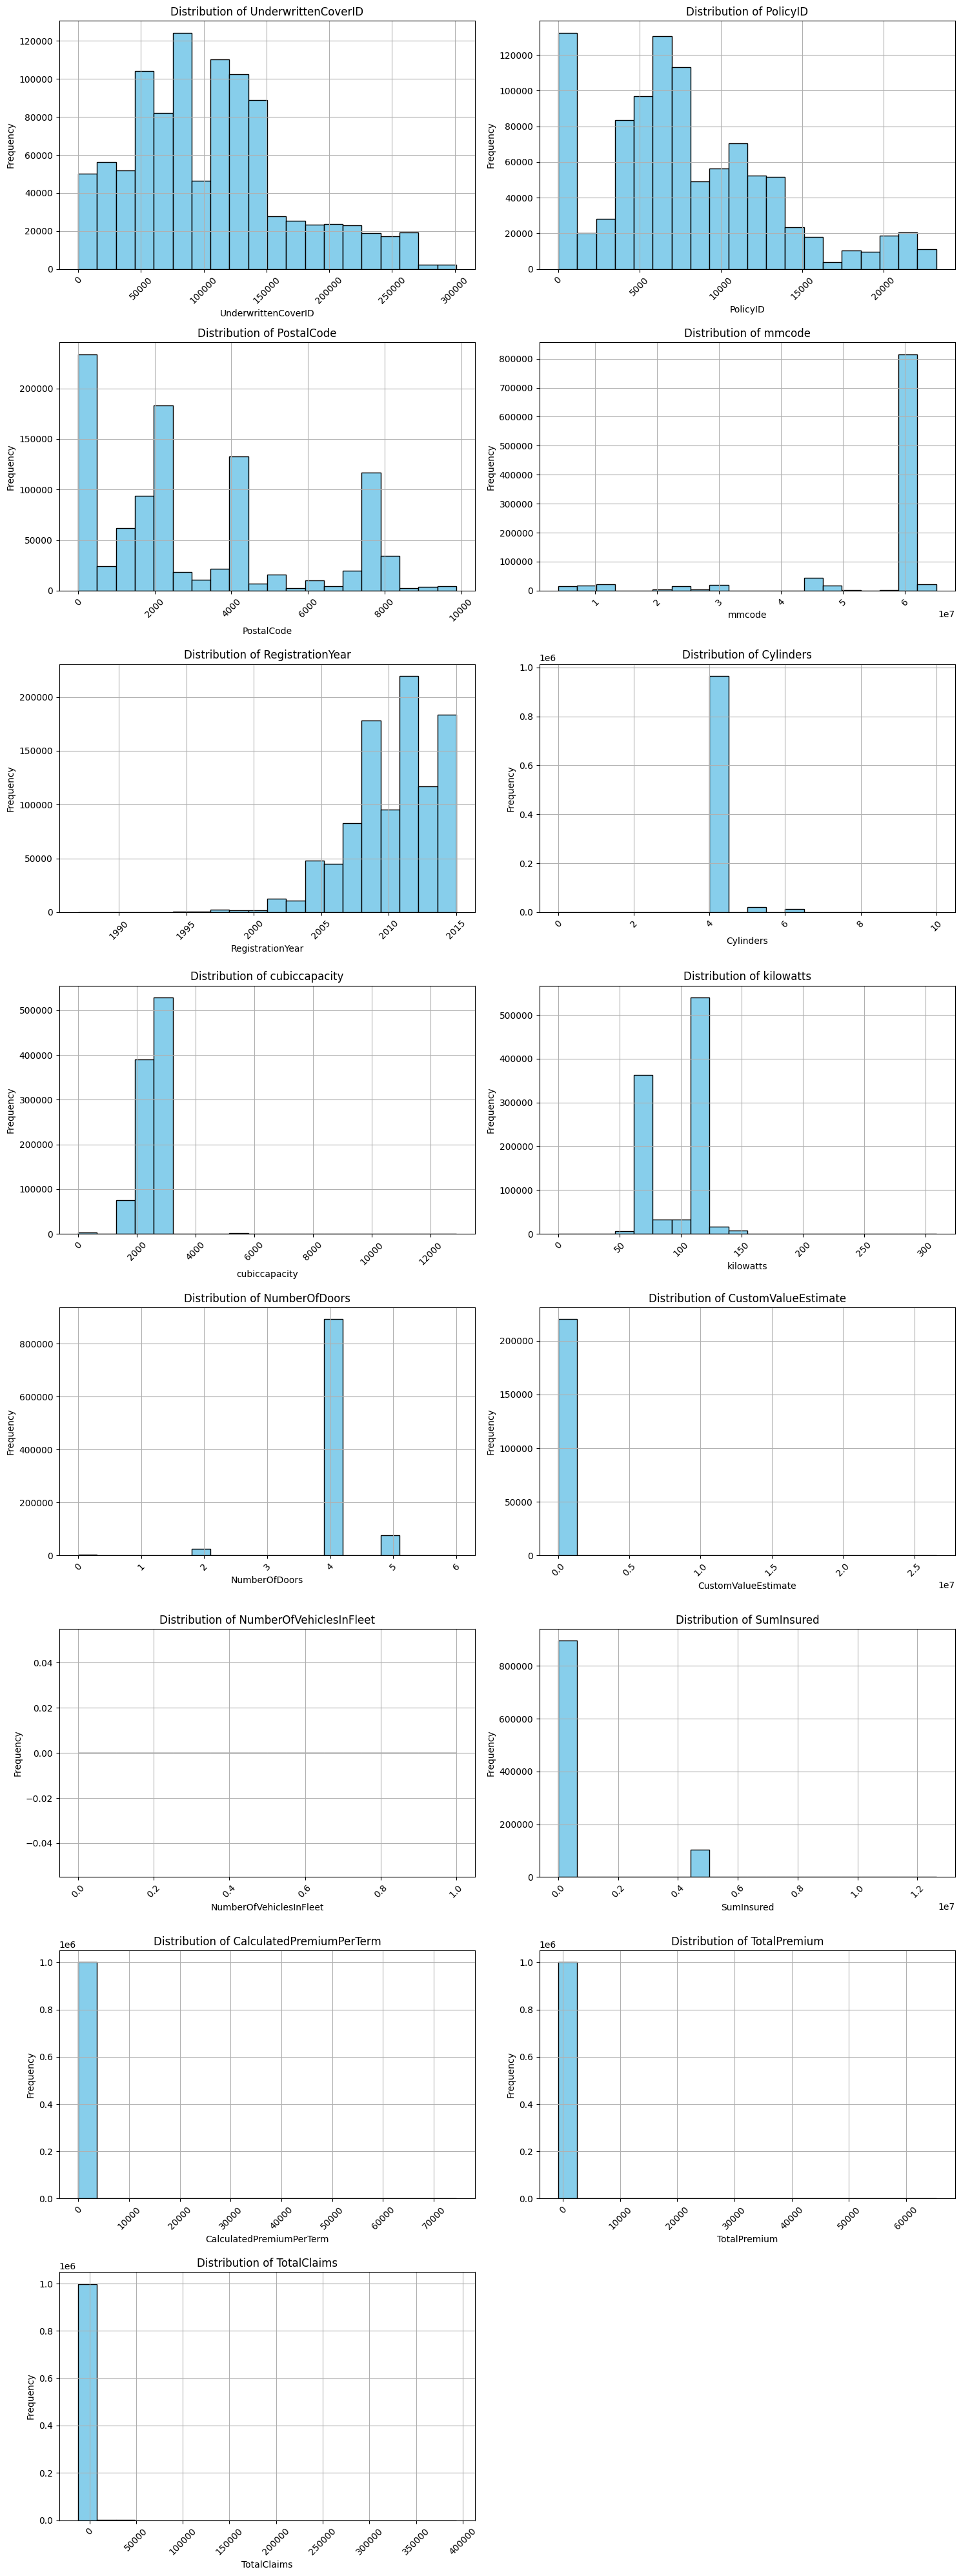

In [5]:
eda.hist_plot_numerical_cols(df.select_dtypes(include=['number']))

#### Bar chart

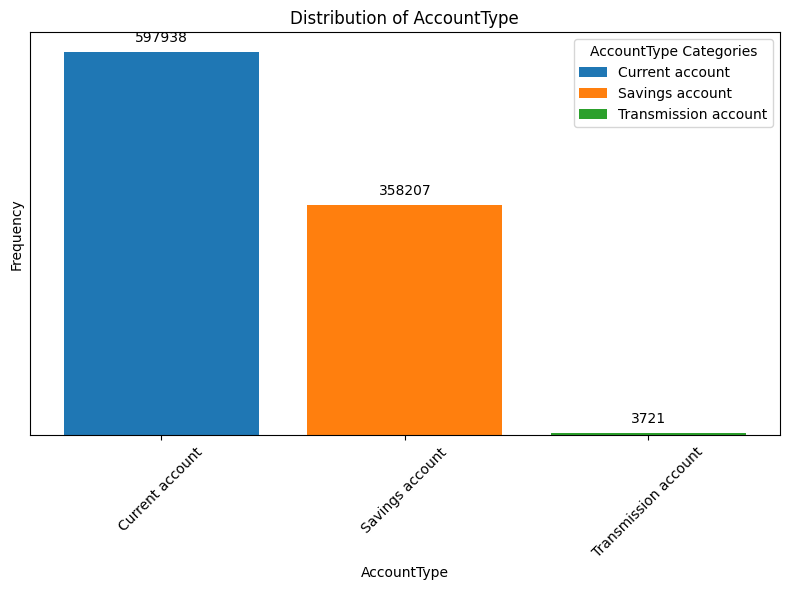

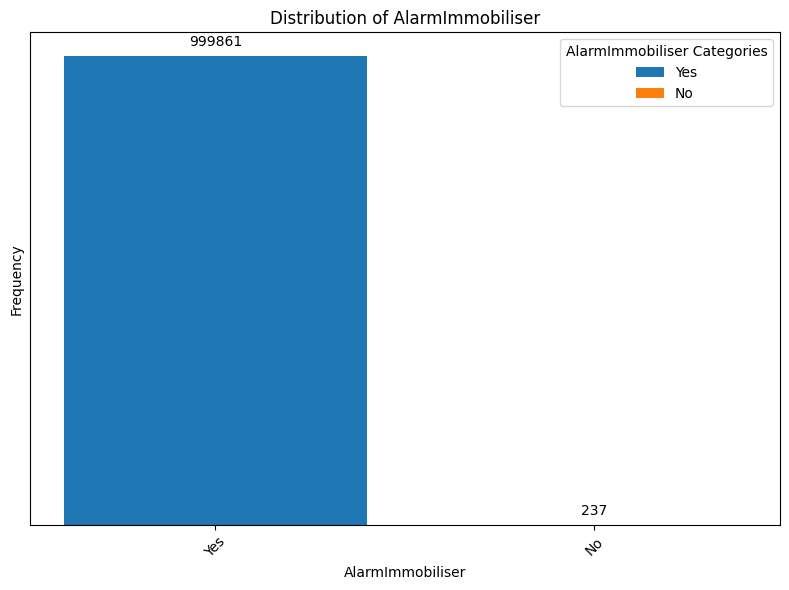

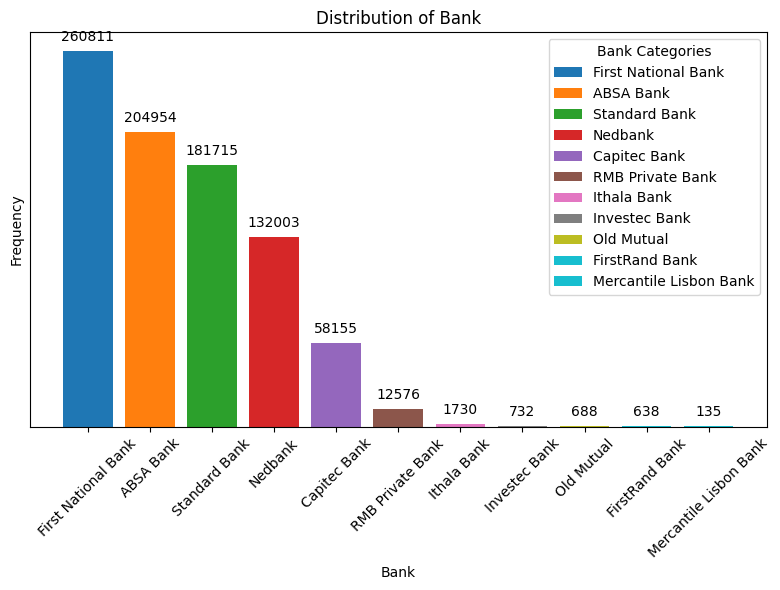

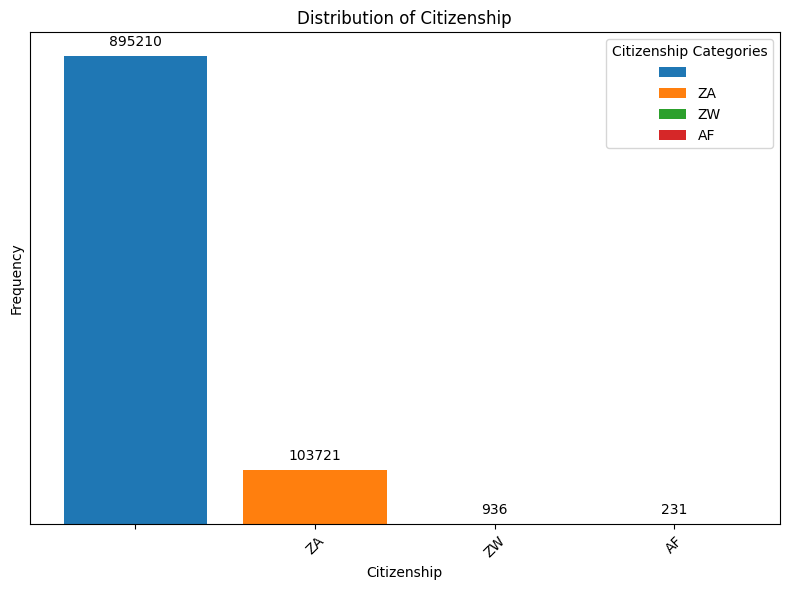

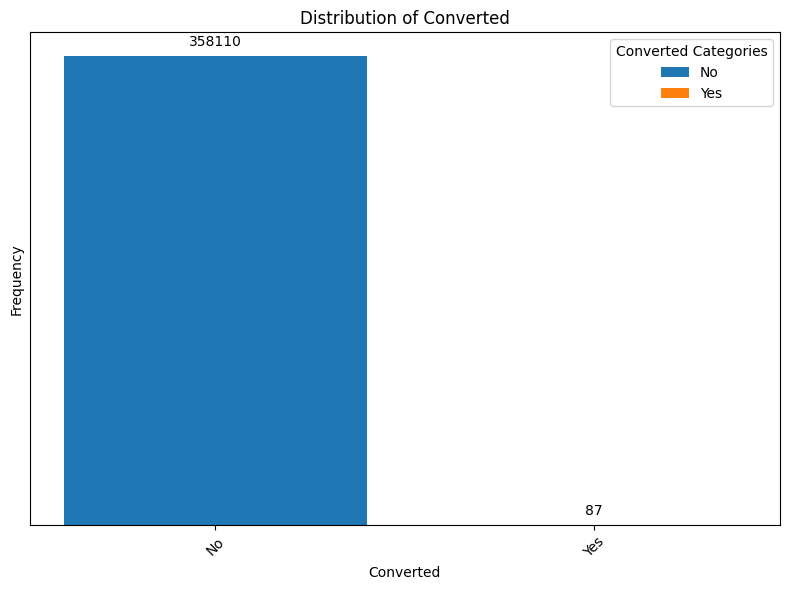

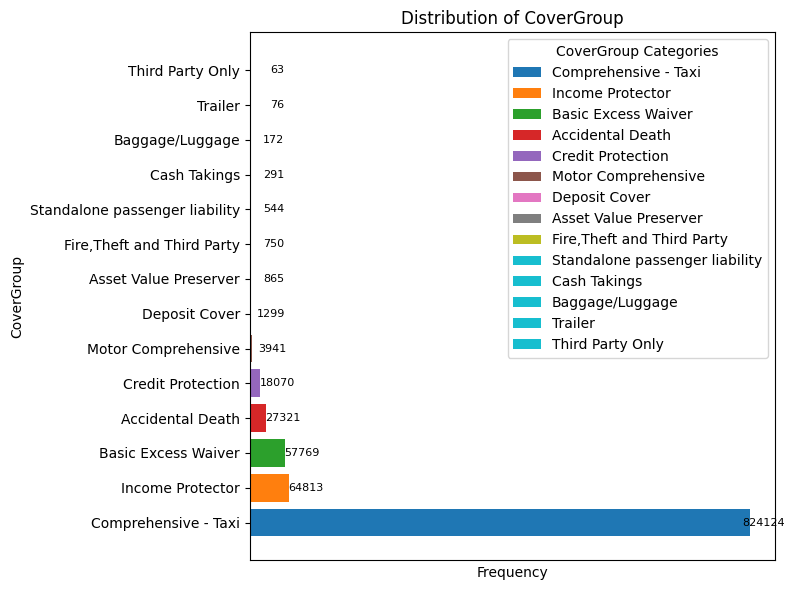

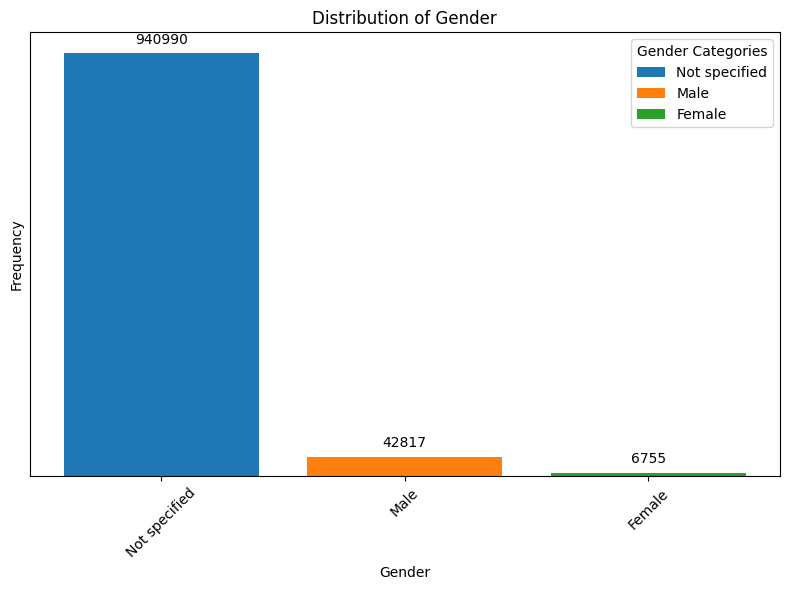

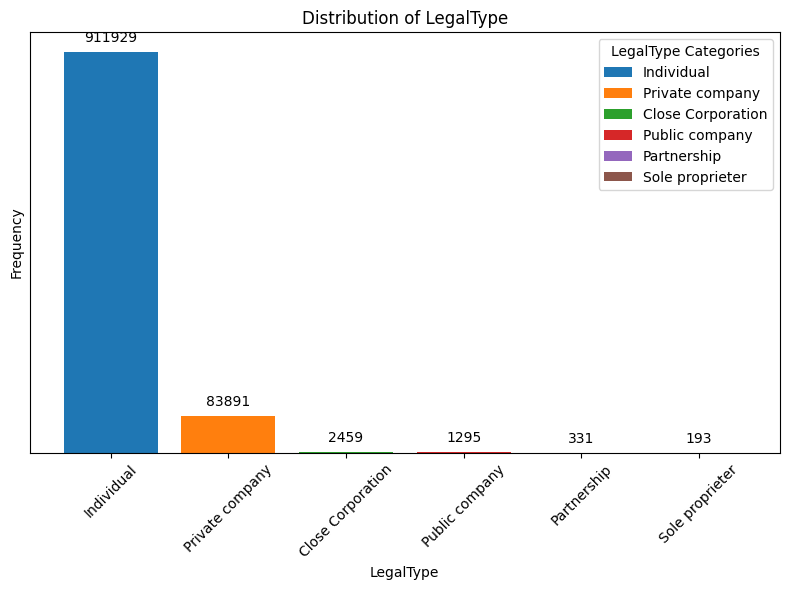

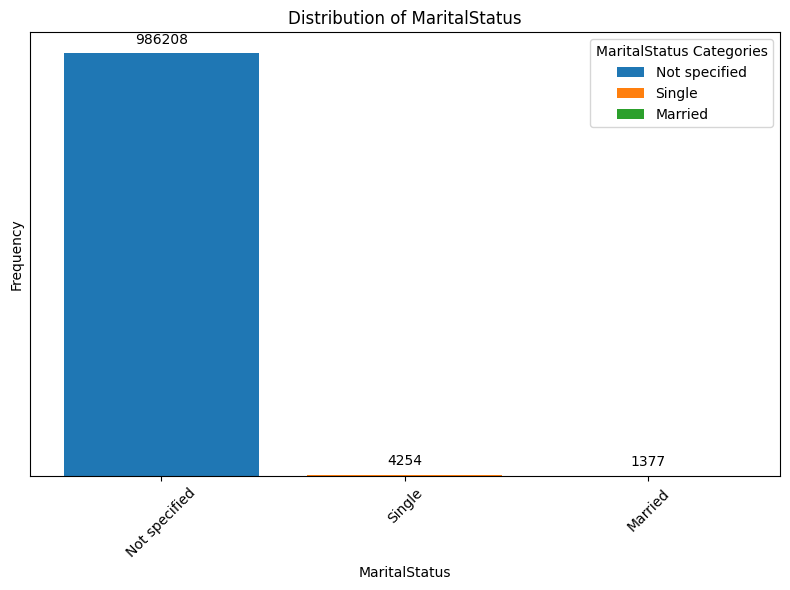

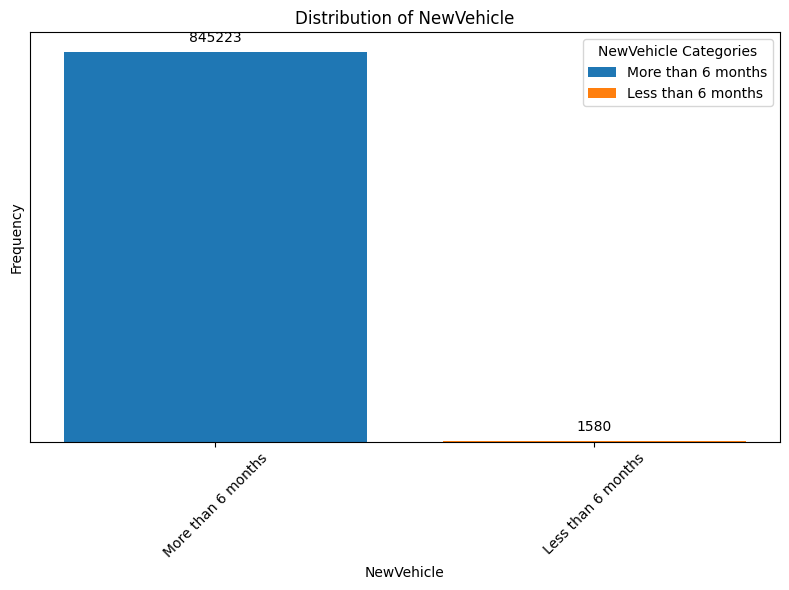

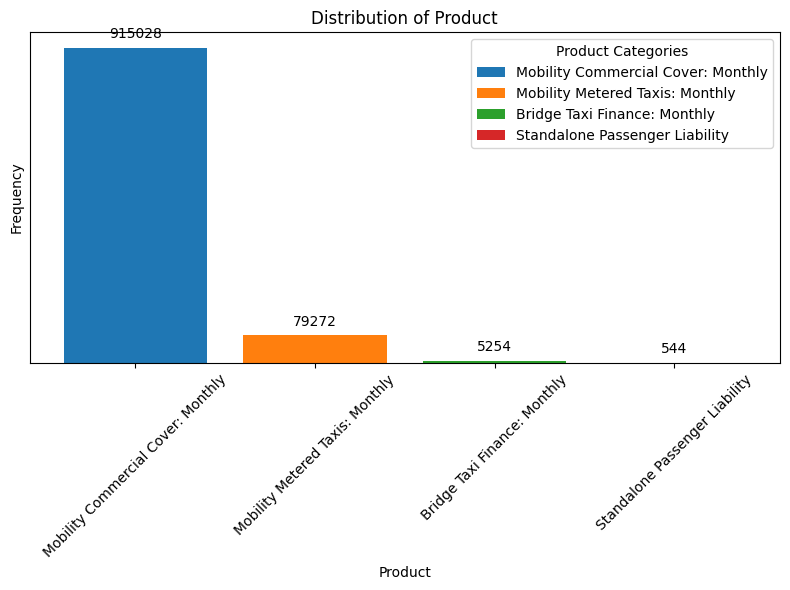

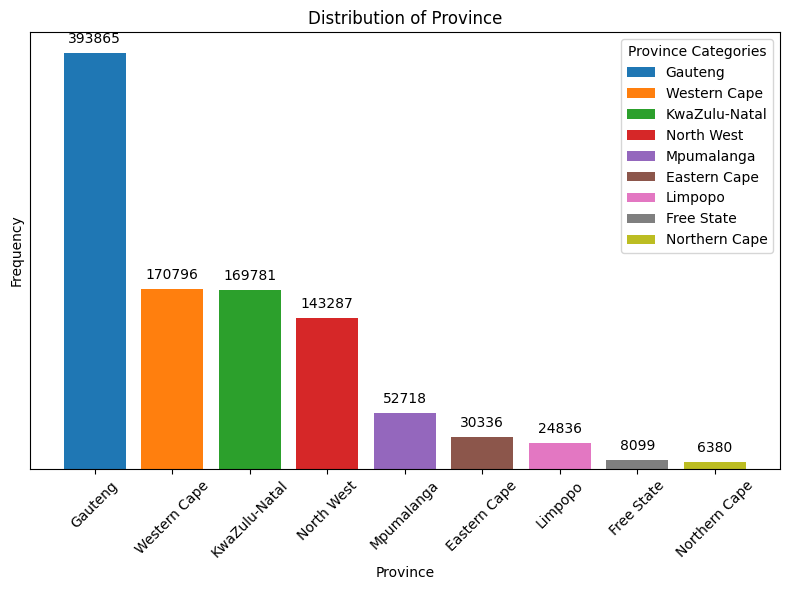

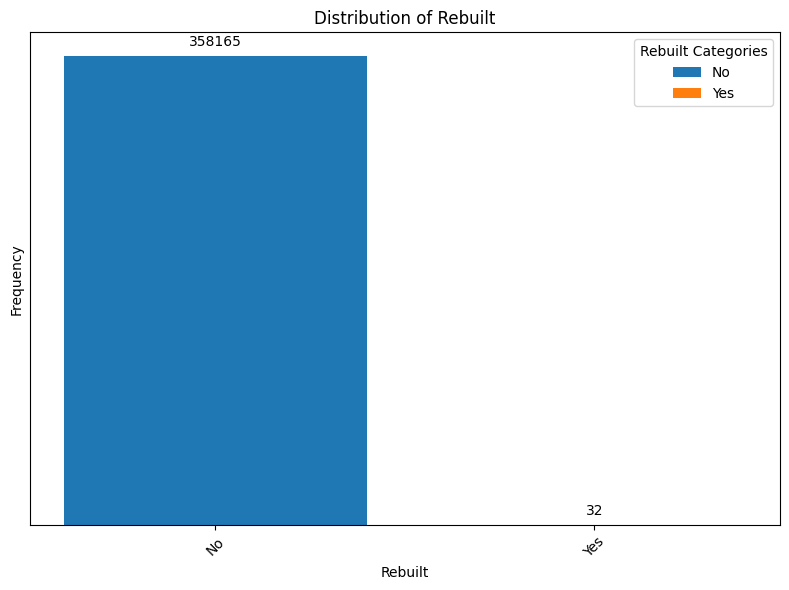

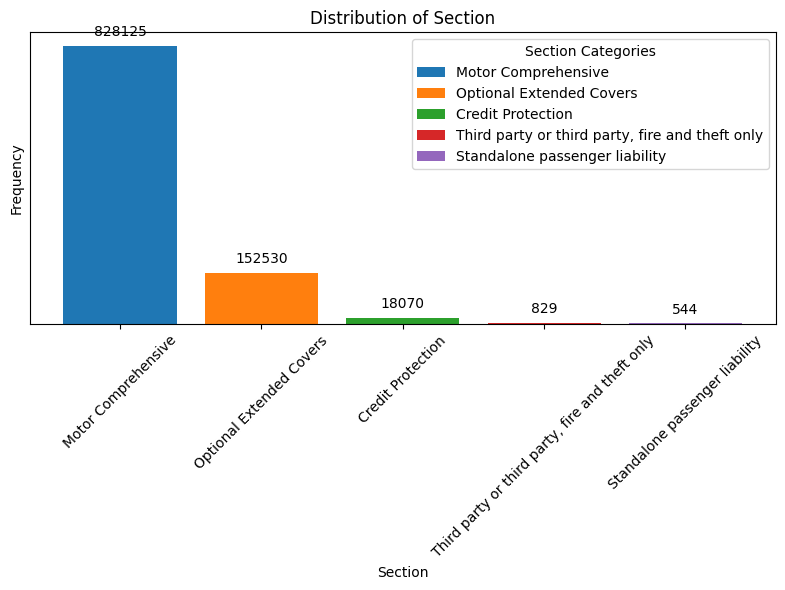

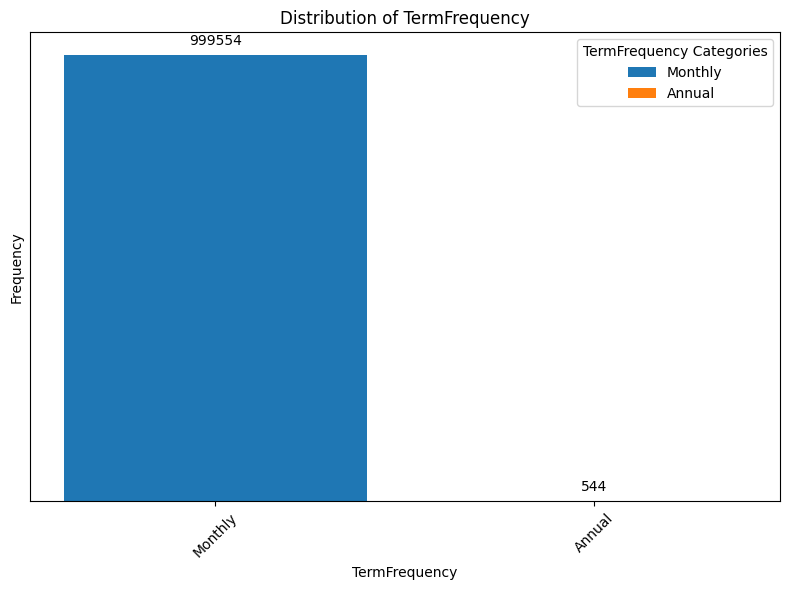

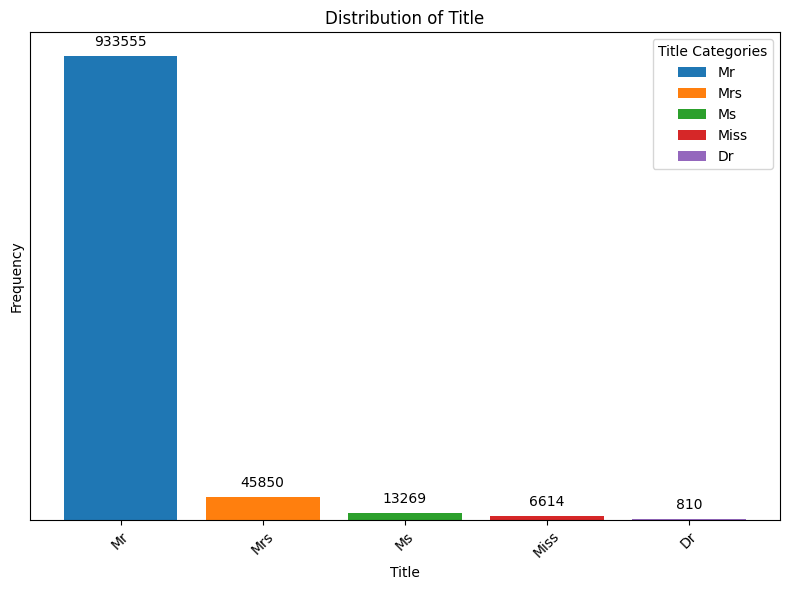

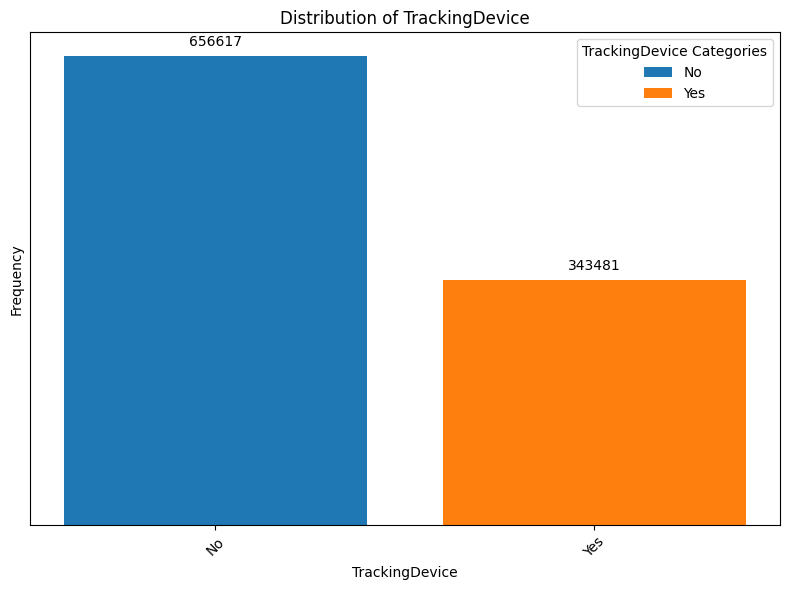

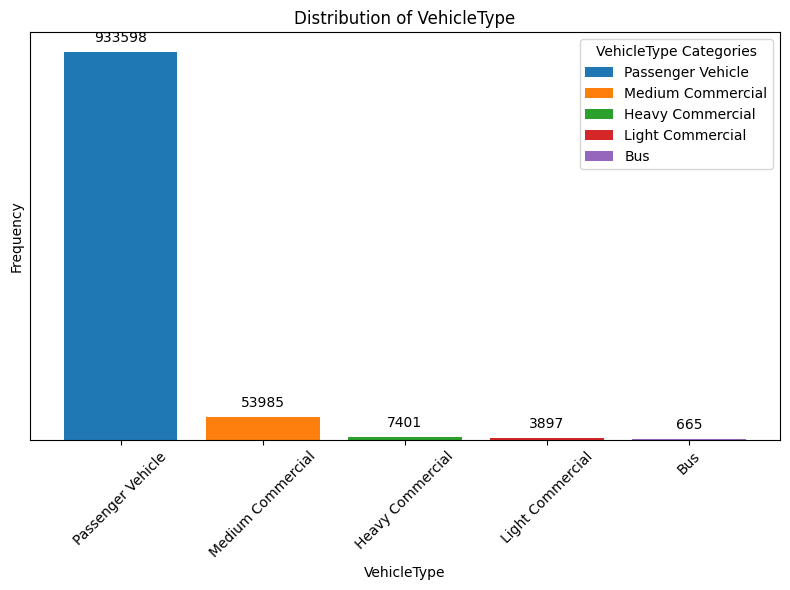

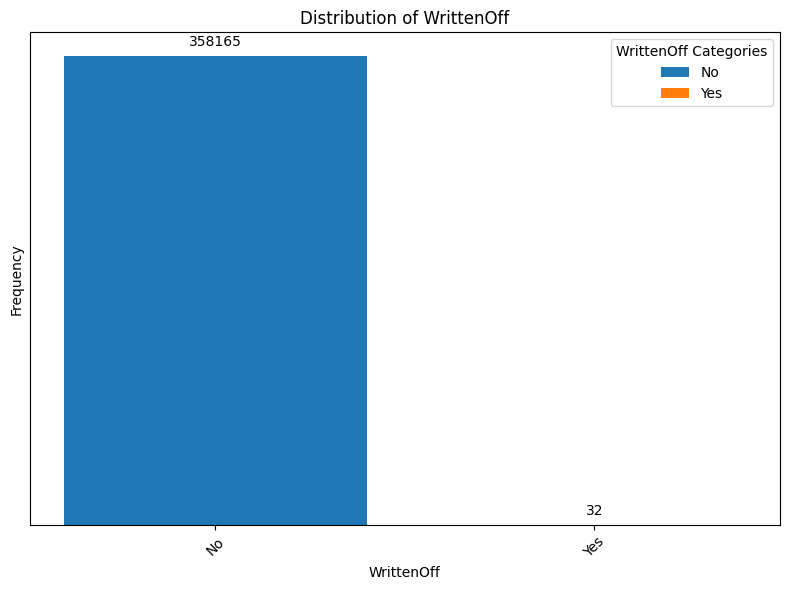

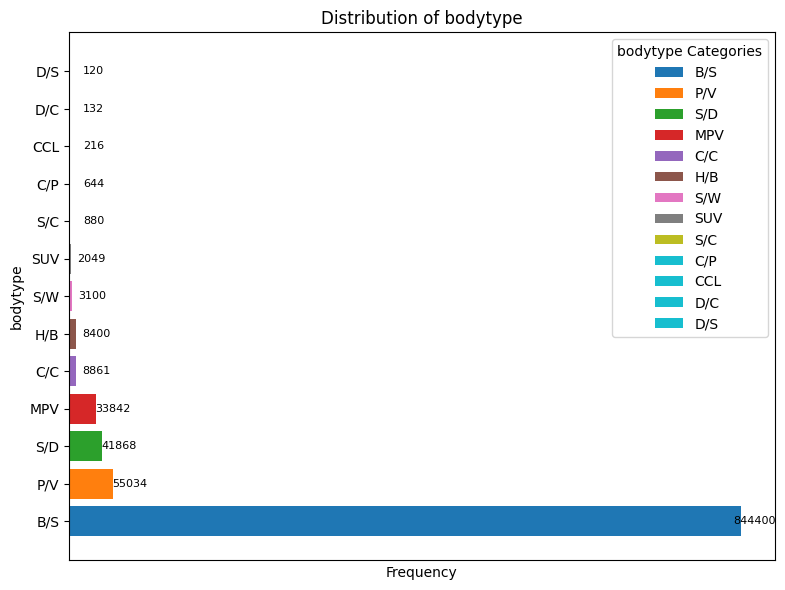

In [6]:
single_value_cols = ['Country', 'ItemType','CrossBorder','StatutoryClass', 'StatutoryRiskType','Language']
too_many_value_cols = ['CoverType','CoverCategory','ExcessSelected','MainCrestaZone','Model','SubCrestaZone','VehicleIntroDate','make']
category_cols = (df.select_dtypes(include=['object'])
.columns.difference(single_value_cols).difference(too_many_value_cols)
.difference(['TransactionMonth','CapitalOutstanding']))
eda.bar_plot_4_categorical(df, category_cols)

# Bivariate or Multivariate Analysis:
### Correlations and Associations: Explore relationships between the monthly changes `TotalPremium` and `TotalClaims` as a function of ZipCode, using `scatter` plots and `correlation` matrices.

In [7]:
df, monthly_data, correlation_matrix = eda.correlation_analysis(df)

In [5]:
correlation_matrix

,PremiumChange,ClaimsChange
PremiumChange,1.000000,0.180453
ClaimsChange,0.180453,1.000000


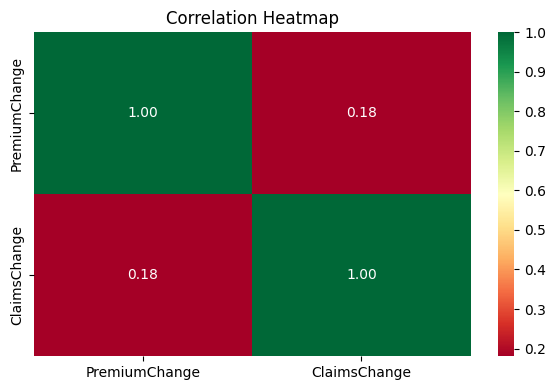

In [6]:
eda.correlation_heatmap(correlation_matrix)

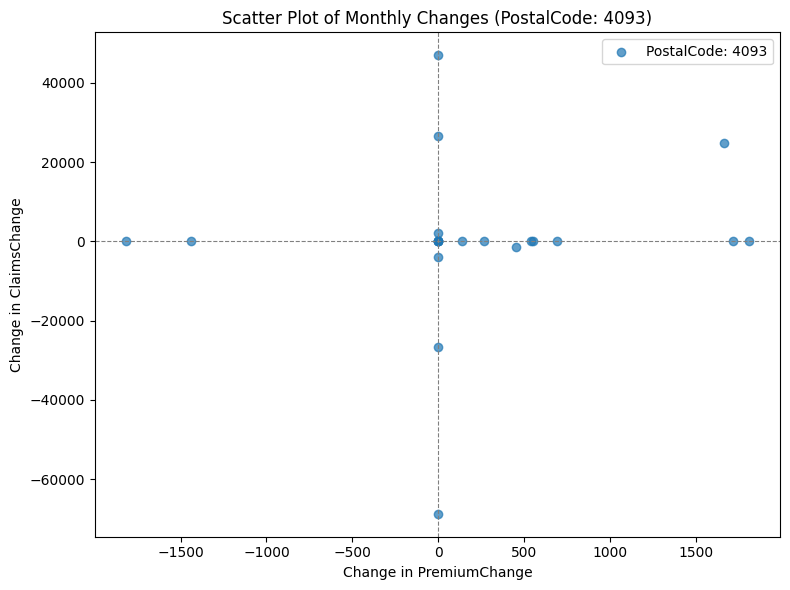

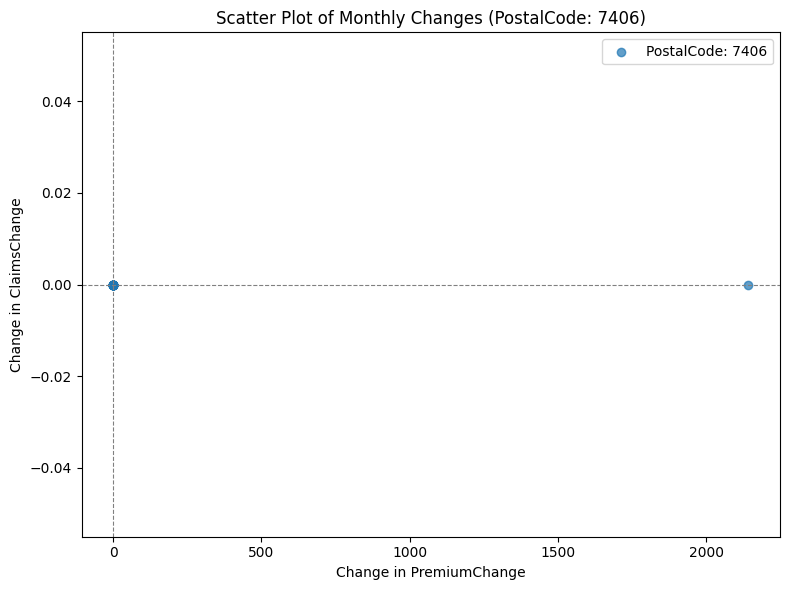

In [7]:
col_1, col_2, col_3 = 'PostalCode','PremiumChange','ClaimsChange'
# Scatter Plots by PostalCode
unique_postal_codes = monthly_data[col_1].unique()
# Sample 5 random postal codes
sampled_postal_codes = random.sample(list(unique_postal_codes), 2)
eda.scatter_plot(monthly_data, sampled_postal_codes, col_1, col_2, col_3)

# Data Comparison
### Trends Over Geography: Compare the change in insurance cover type, premium, auto make, etc. 

In [4]:
cols = ['Province', 'TransactionMonth','CoverType','TotalPremium','make','TotalClaims']
geo_trends = eda.geo_comparision(df, cols)

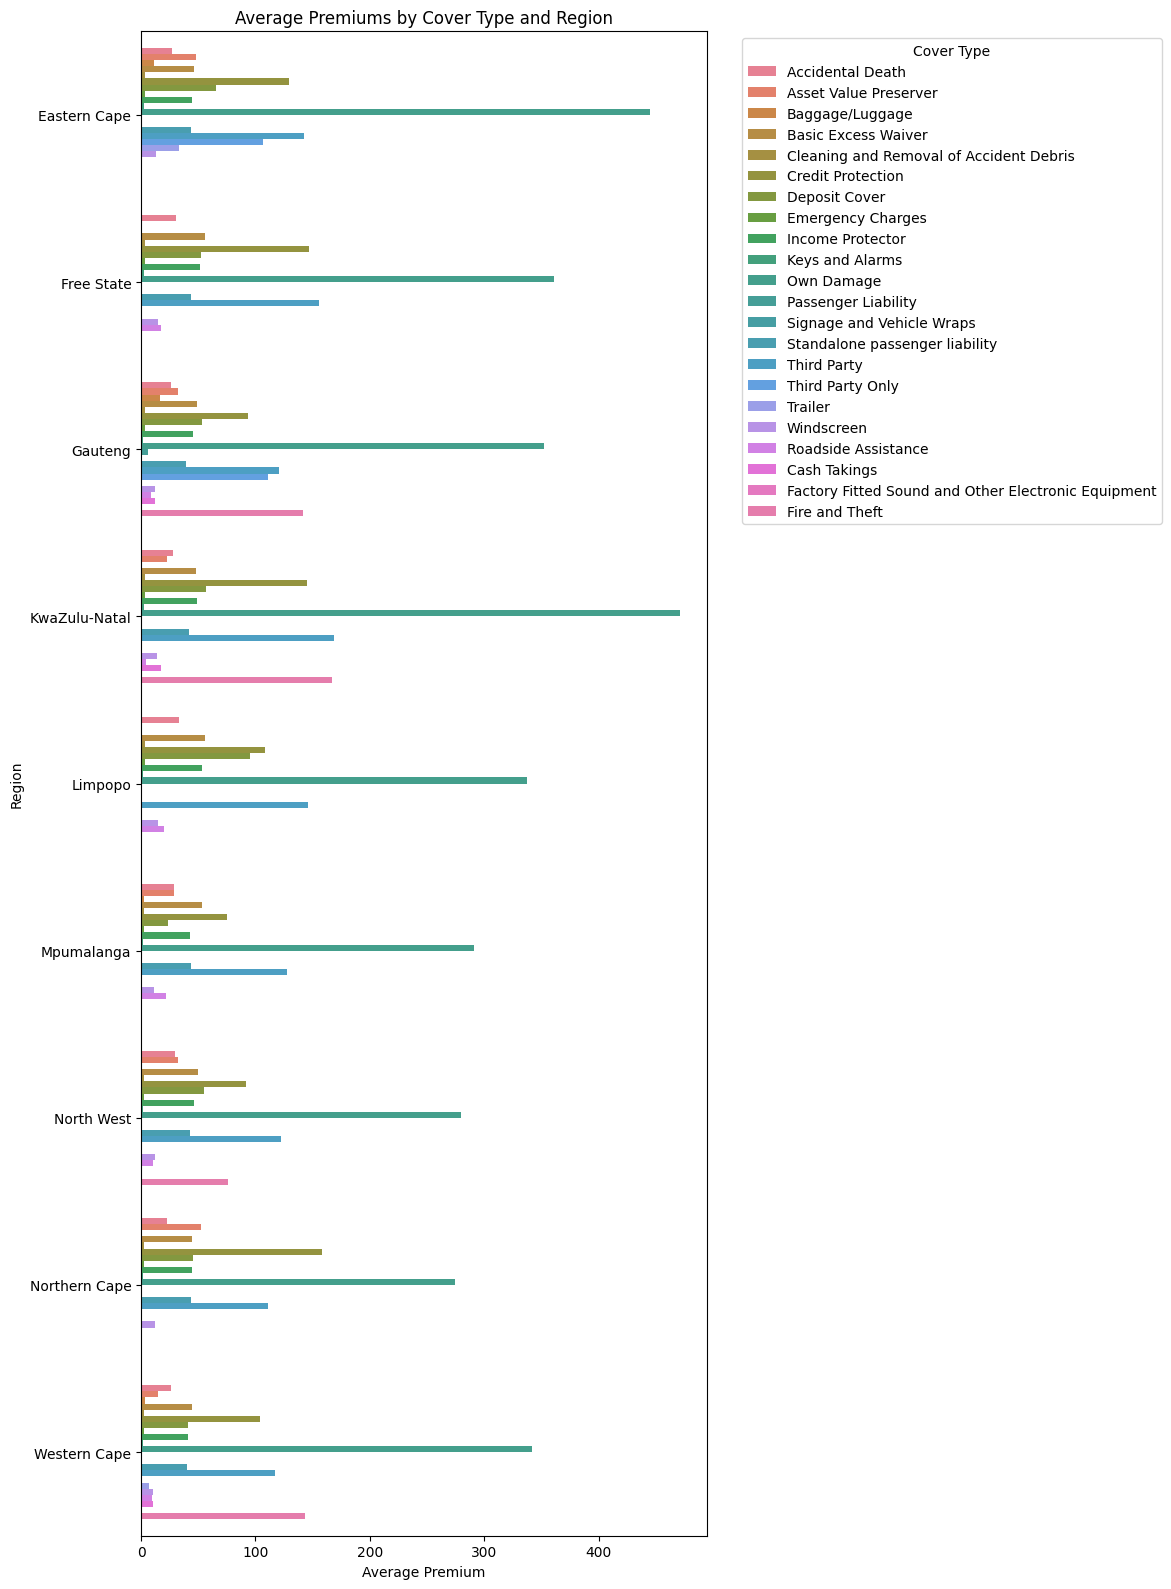

In [5]:
eda.prem_by_cover_type_and_province(df)

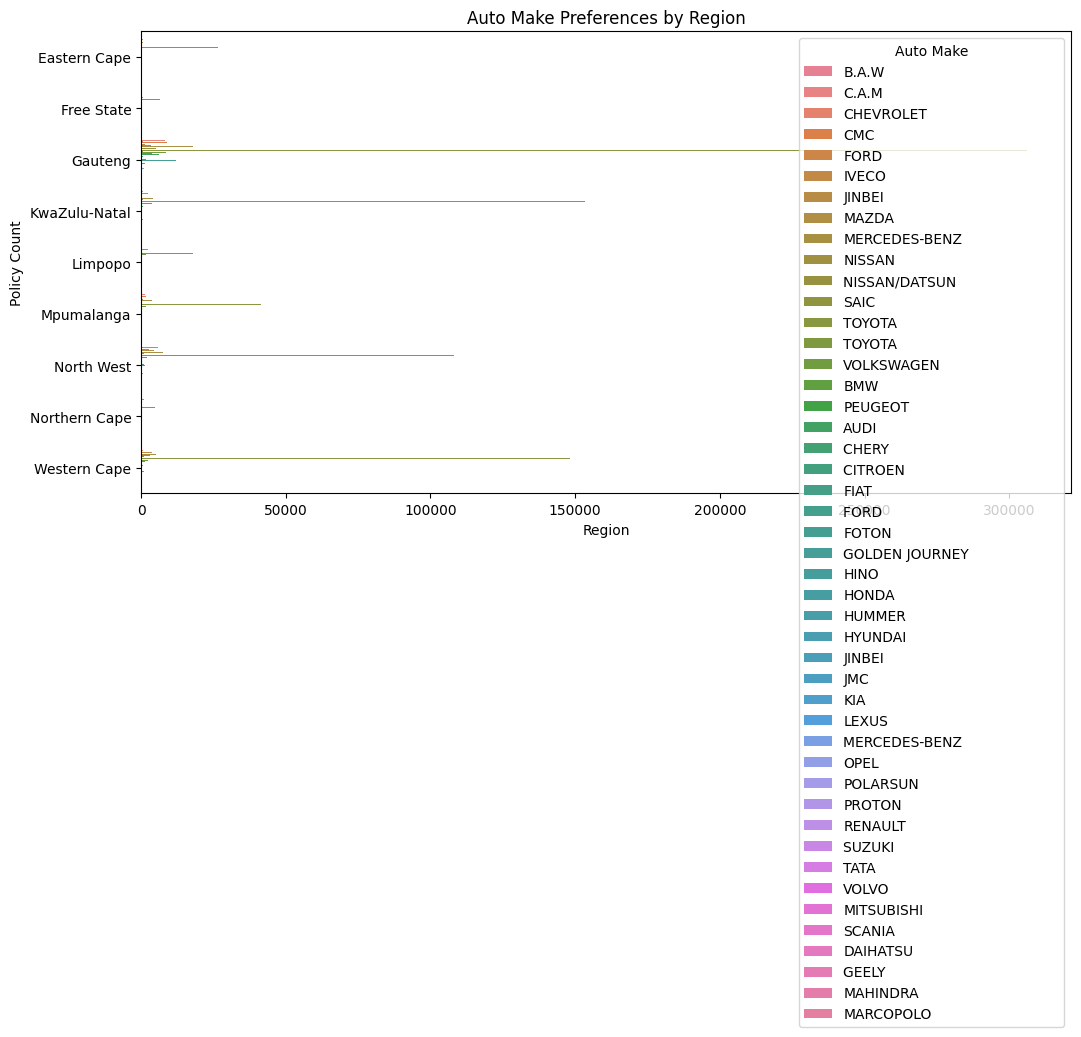

In [6]:
eda.make_preference_by_province(df)

In [7]:
geo_trends['TransactionMonth'] = pd.to_datetime(geo_trends['TransactionMonth'])
geo_trends["Year"] = geo_trends["TransactionMonth"].dt.year

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_3_V1\scripts\eda.py:226: UserWarning: The palette list has more values (16) than needed (9), which may not be intended.
  sns.lineplot(


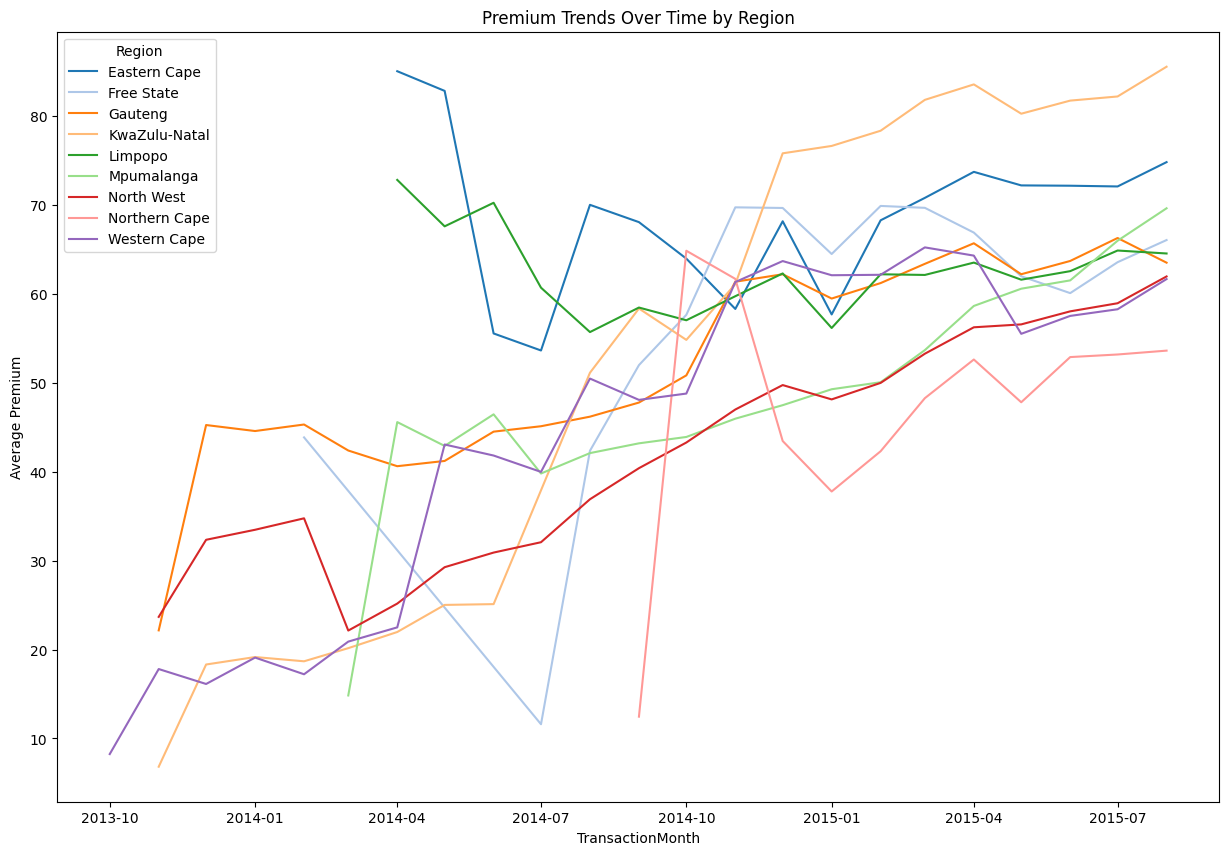

In [8]:
eda.trend_analysis_geo(geo_trends)

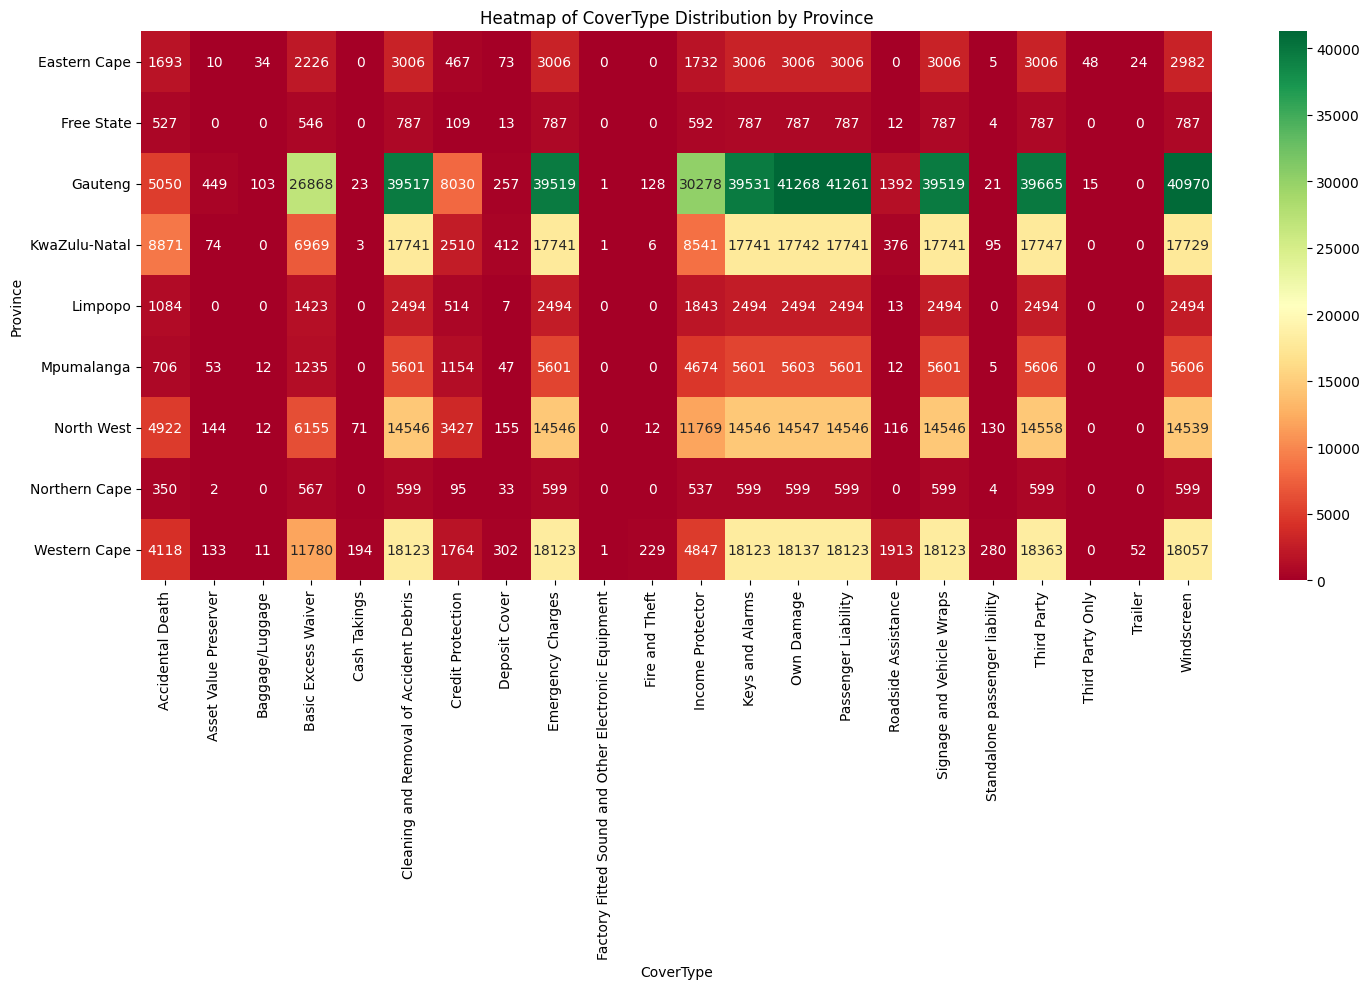

In [9]:
# eda.geo_trend_analysis_visualization(geo_trends, 200, cols)
eda.cover_type_dist_by_province(df)

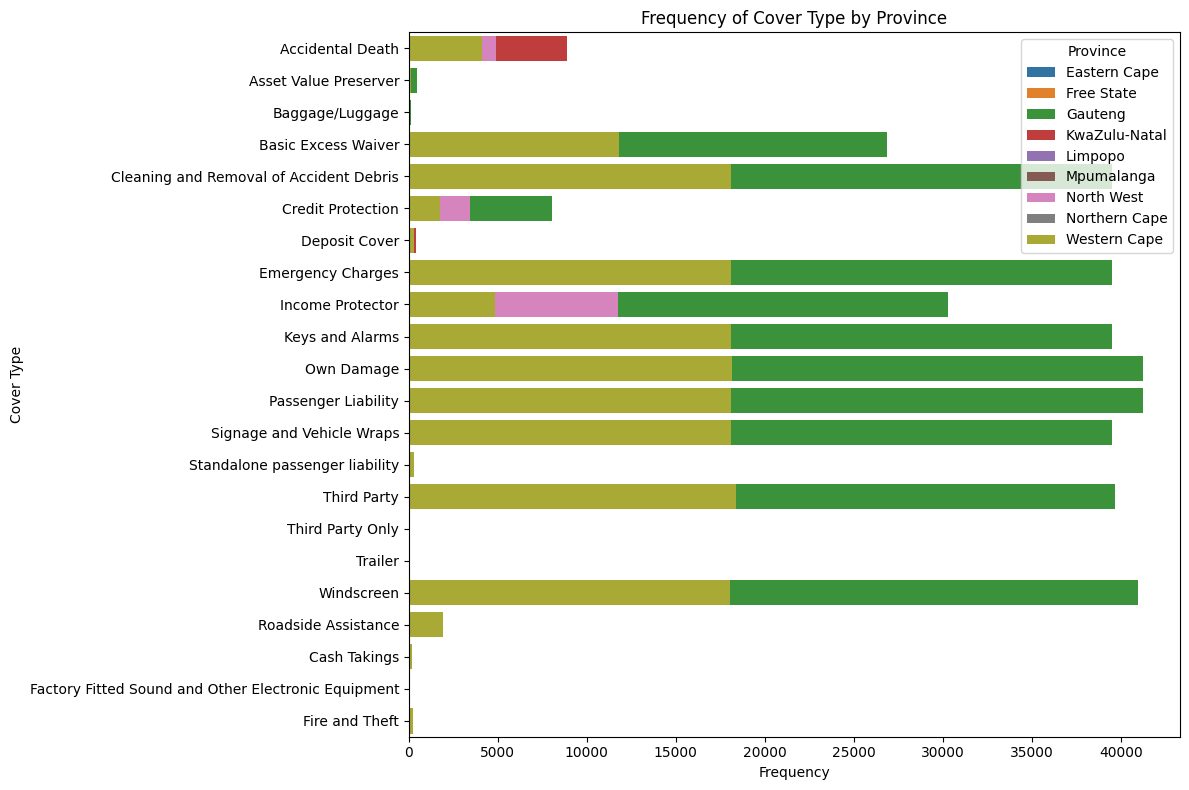

In [10]:
eda.ferq_cover_type_by_province(df)

In [11]:
# cols = ['PremiumChange', 'ClaimsChange', 'Province', 'TotalPremium','CoverType']
eda.scatter_plot_for_corr(geo_trends)

# Outlier Detection:
### Use box plots to detect outliers in numerical data

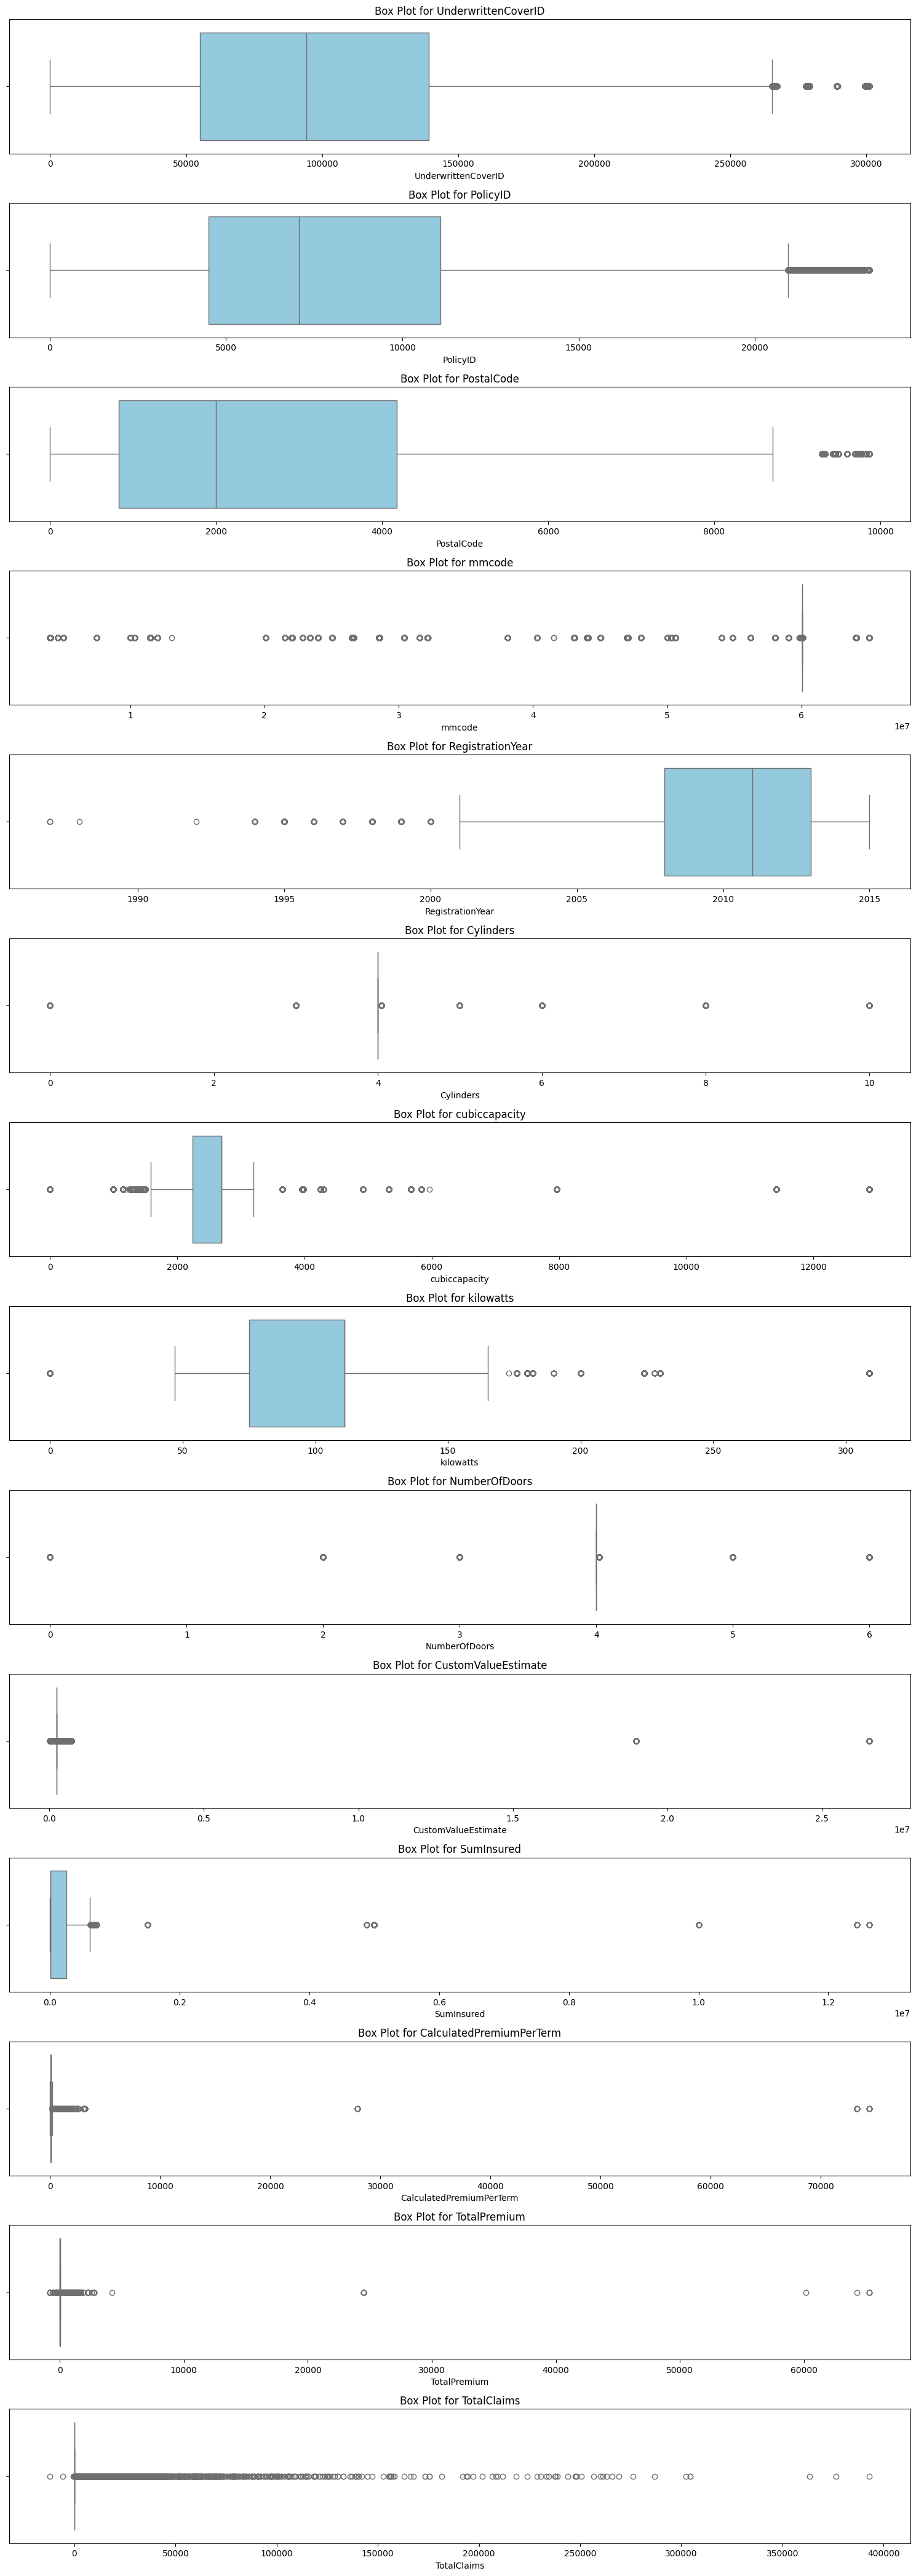

In [5]:
numeric_columns = df.select_dtypes(include=['number']).columns
eda.box_plot_4_outlier_detection(df,numeric_columns)

# Visualization
Produce 3 creative and beautiful plots that capture the key insight you gained from your EDA

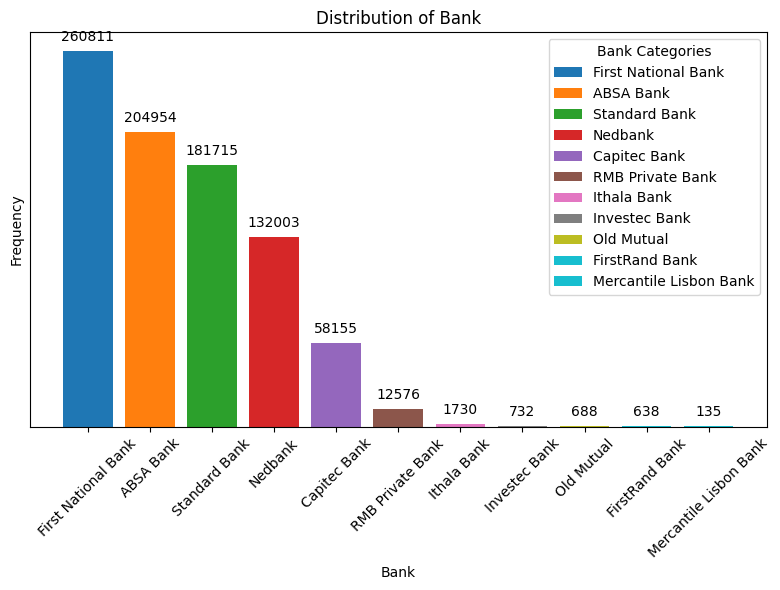

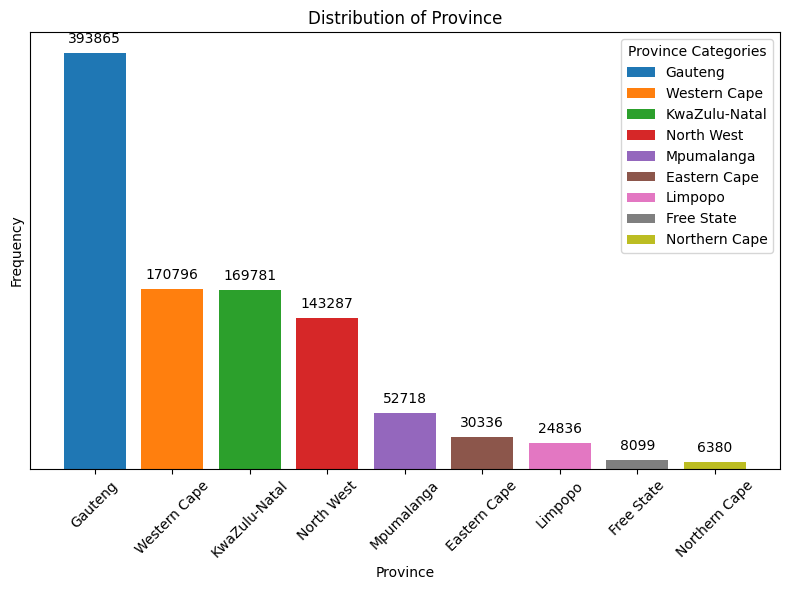

In [21]:
two_selected_category_cols = ['Bank', 'Province']
eda.bar_plot_4_categorical(df, two_selected_category_cols)

In [13]:
eda.scatter_plot_for_corr(geo_trends)

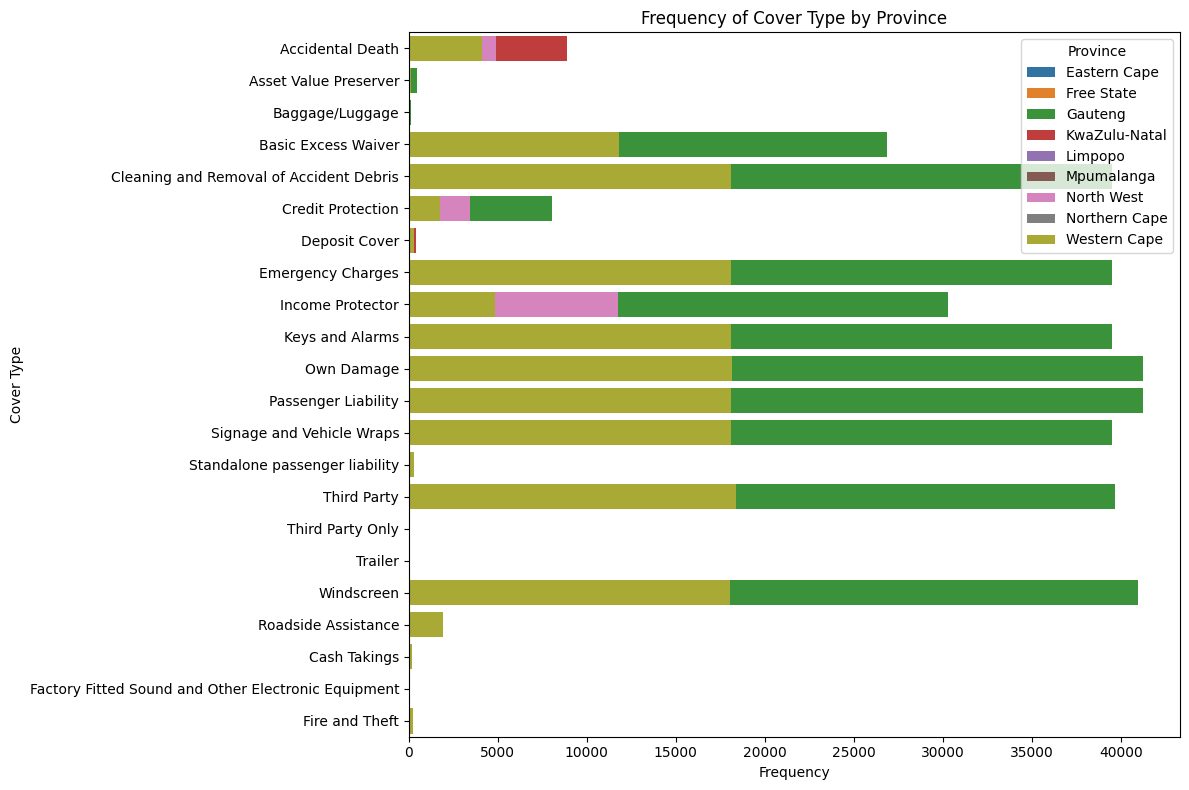

In [14]:
eda.ferq_cover_type_by_province(df)

# Task 3

## Hypothesis Testing

### 1. Null Hypothesis: There are no risk differences across provinces

In [147]:
# Null Hypothesis 1: No risk differences across provinces
# Step 1: Perform ANOVA for TotalClaims across provinces
print("\nTesting TotalClaims across Provinces (ANOVA):")
anova_stat, p_value_claims = test.perform_anova(df, group_column='Province', target_column='TotalClaims')
print(f"F-statistic : {anova_stat}")
print(f"p-value : {p_value_claims}")
print(test.interpret_results(p_value_claims))


Testing TotalClaims across Provinces (ANOVA):
F-statistic : 5.849413762407606
p-value : 1.6782057588675903e-07
Reject the null hypothesis: Significant differences found.


### 1. ANOVA Test (F-test):
#### **ANOVA (Analysis of Variance):** compare the means of a numerical target variable (`TotalClaims`) across multiple groups (`Province`).
#### **Null hypothesis (H₀):** The means of `TotalClaims` are equal across all groups (`Province`).
#### **Alternative hypothesis (H₁):** At least one group has a different mean (`TotalClaims`).
#### **p-value interpretation:** A very small `p-value` (`1.6782057588675903e-07`) indicates that the means are not equal across the `Province` groups, so `reject the null hypothesis`. 

This suggests that there are `Risk significant differences` in `TotalClaims` across different provinces.

### 2. Null Hypothesis: There are no risk differences between zip codes

In [148]:
# Null Hypothesis 2: No risk differences between zip codes
# Perform ANOVA for TotalClaims across Zip Codes
anova_stat, p_value = test.perform_anova(df, group_column='PostalCode', target_column='TotalClaims')
# Results
print(f"ANOVA Test for TotalClaims across Zip Codes:")
print(f"F-statistic : {anova_stat}")
print(f"p-value : {p_value}")
print(test.interpret_results(p_value))

ANOVA Test for TotalClaims across Zip Codes:
F-statistic : 0.9419762214391849
p-value : 0.8906511279164051
Fail to reject the null hypothesis: No significant differences found.


### 3. Null Hypothesis: There are no significant margin (profit) differences between zip codes

In [149]:
# Null Hypothesis 3: No significant margin differences between zip codes
data = test.calculate_profit_margin(df, 'TotalPremium', 'TotalClaims')
# Perform ANOVA for ProfitMargin across Zip Codes
anova_stat, p_value = test.perform_anova(data, group_column='PostalCode', target_column='ProfitMargin')

# Results
print(f"ANOVA Test for ProfitMargin across Zip Codes:")
print(f"F-statistic : {anova_stat}")
print(f"p-value : {p_value}")
print(test.interpret_results(p_value))

ANOVA Test for ProfitMargin across Zip Codes:
F-statistic : 0.8707474893589263
p-value : 0.9976859758015036
Fail to reject the null hypothesis: No significant differences found.


### 4. Null Hypothesis: There are no significant risk differences between Women and Men

In [150]:
# Null Hypothesis 4: No significant risk differences between women and men
t_stat, p_value = test.perform_t_test(df, 'Gender', 'TotalClaims', 'Male', 'Female')
# Results
print(f"T-Test for TotalClaims between Genders:")
print(f"t-statistic : {t_stat}")
print(f"p-value : {p_value}")
print(test.interpret_results(p_value))

T-Test for TotalClaims between Genders:
t-statistic : -0.24803623812388725
p-value : 0.8041073961270343
Fail to reject the null hypothesis: No significant differences found.


### Null Hypothesis 5: No association between `Categorical` variables vs `Target` variables

## Statistical Testing
### Conduct chi-squared for categorical data to evaluate the impact of these features on my target variable `TotalClaims`

In [154]:
data_related_cols = ['TransactionMonth','VehicleIntroDate', 'CapitalOutstanding','Converted']
category_cols = df.select_dtypes(include='object').columns.difference(data_related_cols)
# Run Chi-squared test for categorical features
categorical_results_df_claims = test.chi_squared_test_with_target_var(df, 'TotalClaims', category_cols)


In [158]:
categorical_results_df_claims[categorical_results_df_claims['Chi2 Interpretation'] == 'Weak or no association']['Feature']

1      AlarmImmobiliser
3           Citizenship
4               Country
6            CoverGroup
8           CrossBorder
10               Gender
11             ItemType
12             Language
13            LegalType
17           NewVehicle
20              Rebuilt
21              Section
22       StatutoryClass
23    StatutoryRiskType
24        SubCrestaZone
25        TermFrequency
27       TrackingDevice
29           WrittenOff
Name: Feature, dtype: object

the above feature which have `weak association` and `no significance risk differnce` with the target variable (`TotalClaims`) based on `chi2` and `p-value` interpretation  
Features with weak Chi-squared statistics indicate little to no dependency on the target variable and are unlikely to improve the model's predictive power. A high p-value further suggests that any observed association could be due to random chance, making such features potential sources of noise. Removing irrelevant or weakly associated features simplifies the model, reduces overfitting, enhances interpretability, and lowers computational costs, particularly in high-dimensional datasets where dimensionality reduction is critical for efficient modeling.

In [152]:
df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isna().sum()>0]

Bank                  145961
AccountType            40232
MaritalStatus           8259
Gender                  9536
VehicleType              552
make                     552
Model                    552
bodytype                 552
VehicleIntroDate         552
CapitalOutstanding         2
NewVehicle            153295
WrittenOff            641901
Rebuilt               641901
Converted             641901
CrossBorder           999400
dtype: int64

In [159]:
weak_features = [
    "AlarmImmobiliser", "Citizenship", "Country", "CoverGroup", "CrossBorder",
    "ItemType", "Language", "NewVehicle", "Rebuilt", "StatutoryClass",
    "StatutoryRiskType", "TermFrequency", "WrittenOff", "Gender", "LegalType", "Section",
    "SubCrestaZone", "TrackingDevice"
]
df[weak_features].isna().sum()

AlarmImmobiliser          0
Citizenship               0
Country                   0
CoverGroup                0
CrossBorder          999400
ItemType                  0
Language                  0
NewVehicle           153295
Rebuilt              641901
StatutoryClass            0
StatutoryRiskType         0
TermFrequency             0
WrittenOff           641901
Gender                 9536
LegalType                 0
Section                   0
SubCrestaZone             0
TrackingDevice            0
dtype: int64

In [160]:
df[df[['mmcode', 'VehicleType']].isnull()]

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,ProfitMargin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 4
## Statistical Modeling

### 1. Data Preparation

#### **Handling Missing Data:** Impute or remove missing values based on their nature and the quantity missing.

#### To check the missed values

In [161]:
df.isna().sum()[df.isna().sum() > 0]

Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

#### When I observe the result most attribues have similar missed records which is `552`

In [162]:
df.isna().sum()[df.isna().sum() == 552]

mmcode              552
VehicleType         552
make                552
Model               552
Cylinders           552
cubiccapacity       552
kilowatts           552
bodytype            552
NumberOfDoors       552
VehicleIntroDate    552
dtype: int64

#### Based on this I checked rows that have missed values of those columns then my result shows those columns have same missed records, let see it 

In [163]:
df[df[['mmcode', 'VehicleType']].isnull()]

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,ProfitMargin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Therefore, I folowed the approach `droping` the rows that have `missing values` of `10 columns` because replacing those values with any statistical value doesn't have contribution.
#### While for the other missed values I folowed `mean` values for numeric columns and `mode` values for categorical columns missed value handles  
#### The other Approach I followed is droping columns that have almost all rows are missed `NumberOfVehiclesInFleet`

## Handling all missing values

In [164]:
df = pre_pro.handling_missing_values(df)
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [165]:
df.shape

(163372, 31)

#### **Feature Engineering:** Create new features that might be relevant to TotalPremium and TotalClaims.

In [166]:
df = pre_pro.feature_engineering(df)

c:\Users\Admin\10_Academy_AI_Mastery_kifiya_Week_3_V1\scripts\Preprocessing.py:76: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'])


In [167]:
df.shape

(163372, 34)

### Resampling to handle skewness of categorical values

In [168]:
df = pre_pro.mean_count_resampling(df)

#### **Encoding Categorical Data:** Convert categorical data into a numeric format using one-hot encoding or label encoding to make it suitable for modeling.

In [169]:
df = pre_pro.categorical_encoding(df)
df.shape

(163326, 235)

### Write preprocessed data


In [171]:
df.to_csv('Preprocessed_data.csv', index = False)

### Read Preprocessed data

In [172]:
df = pd.read_csv('Preprocessed_data.csv')

#### **Train-Test Split:** Divide the data into a training set (for building the model) and a test set (for validating the model), typically using a 70:30 or 80:20 ratio.

In [173]:
X_train, X_test, y_train, y_test  = pre_pro.Train_Test_Split(df, 0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(130660, 232) (32666, 232) (130660,) (32666,)


## Modeling Techniques

### Linear Regression

In [188]:
lin_reg = model.linear_regression(X_train, y_train)
model.model_performamnce(lin_reg, X_test, y_test)

Mean Squared Error: 4522342.241170061
Mean Absolute Error: 783.1887934746361
Root Mean Squared Error: 2126.5799399905145
R-squared: 0.9288522419873865


### Decision Trees

In [183]:
dt_reg = model.decision_tree(X_train, y_train)
model.model_performamnce(dt_reg, X_test, y_test)

Mean Squared Error: 5.1042650167742255e-22
R-squared: 1.0


### Random Forests

In [185]:
rf_reg = model.random_forest(X_train, y_train)
model.model_performamnce(rf_reg, X_test, y_test)

Mean Squared Error: 3.8148964139800955e-23
R-squared: 1.0


### Gradient Boosting Machines (GBMs):
 * XGBoost

In [186]:
xgb_reg = model.XGBRegressor_model(X_train, y_train)
model.model_performamnce(xgb_reg, X_test, y_test)

Mean Squared Error: 8.079731438011676e-07
R-squared: 0.9999999999999873


### Model Building
Implement Linear Regression, Random Forests, and XGBoost models

### Model Evaluation
Evaluate each model using appropriate metrics like accuracy, precision, recall, and F1-score.

### Feature Importance Analysis
Analyze which features are most influential in predicting retention.

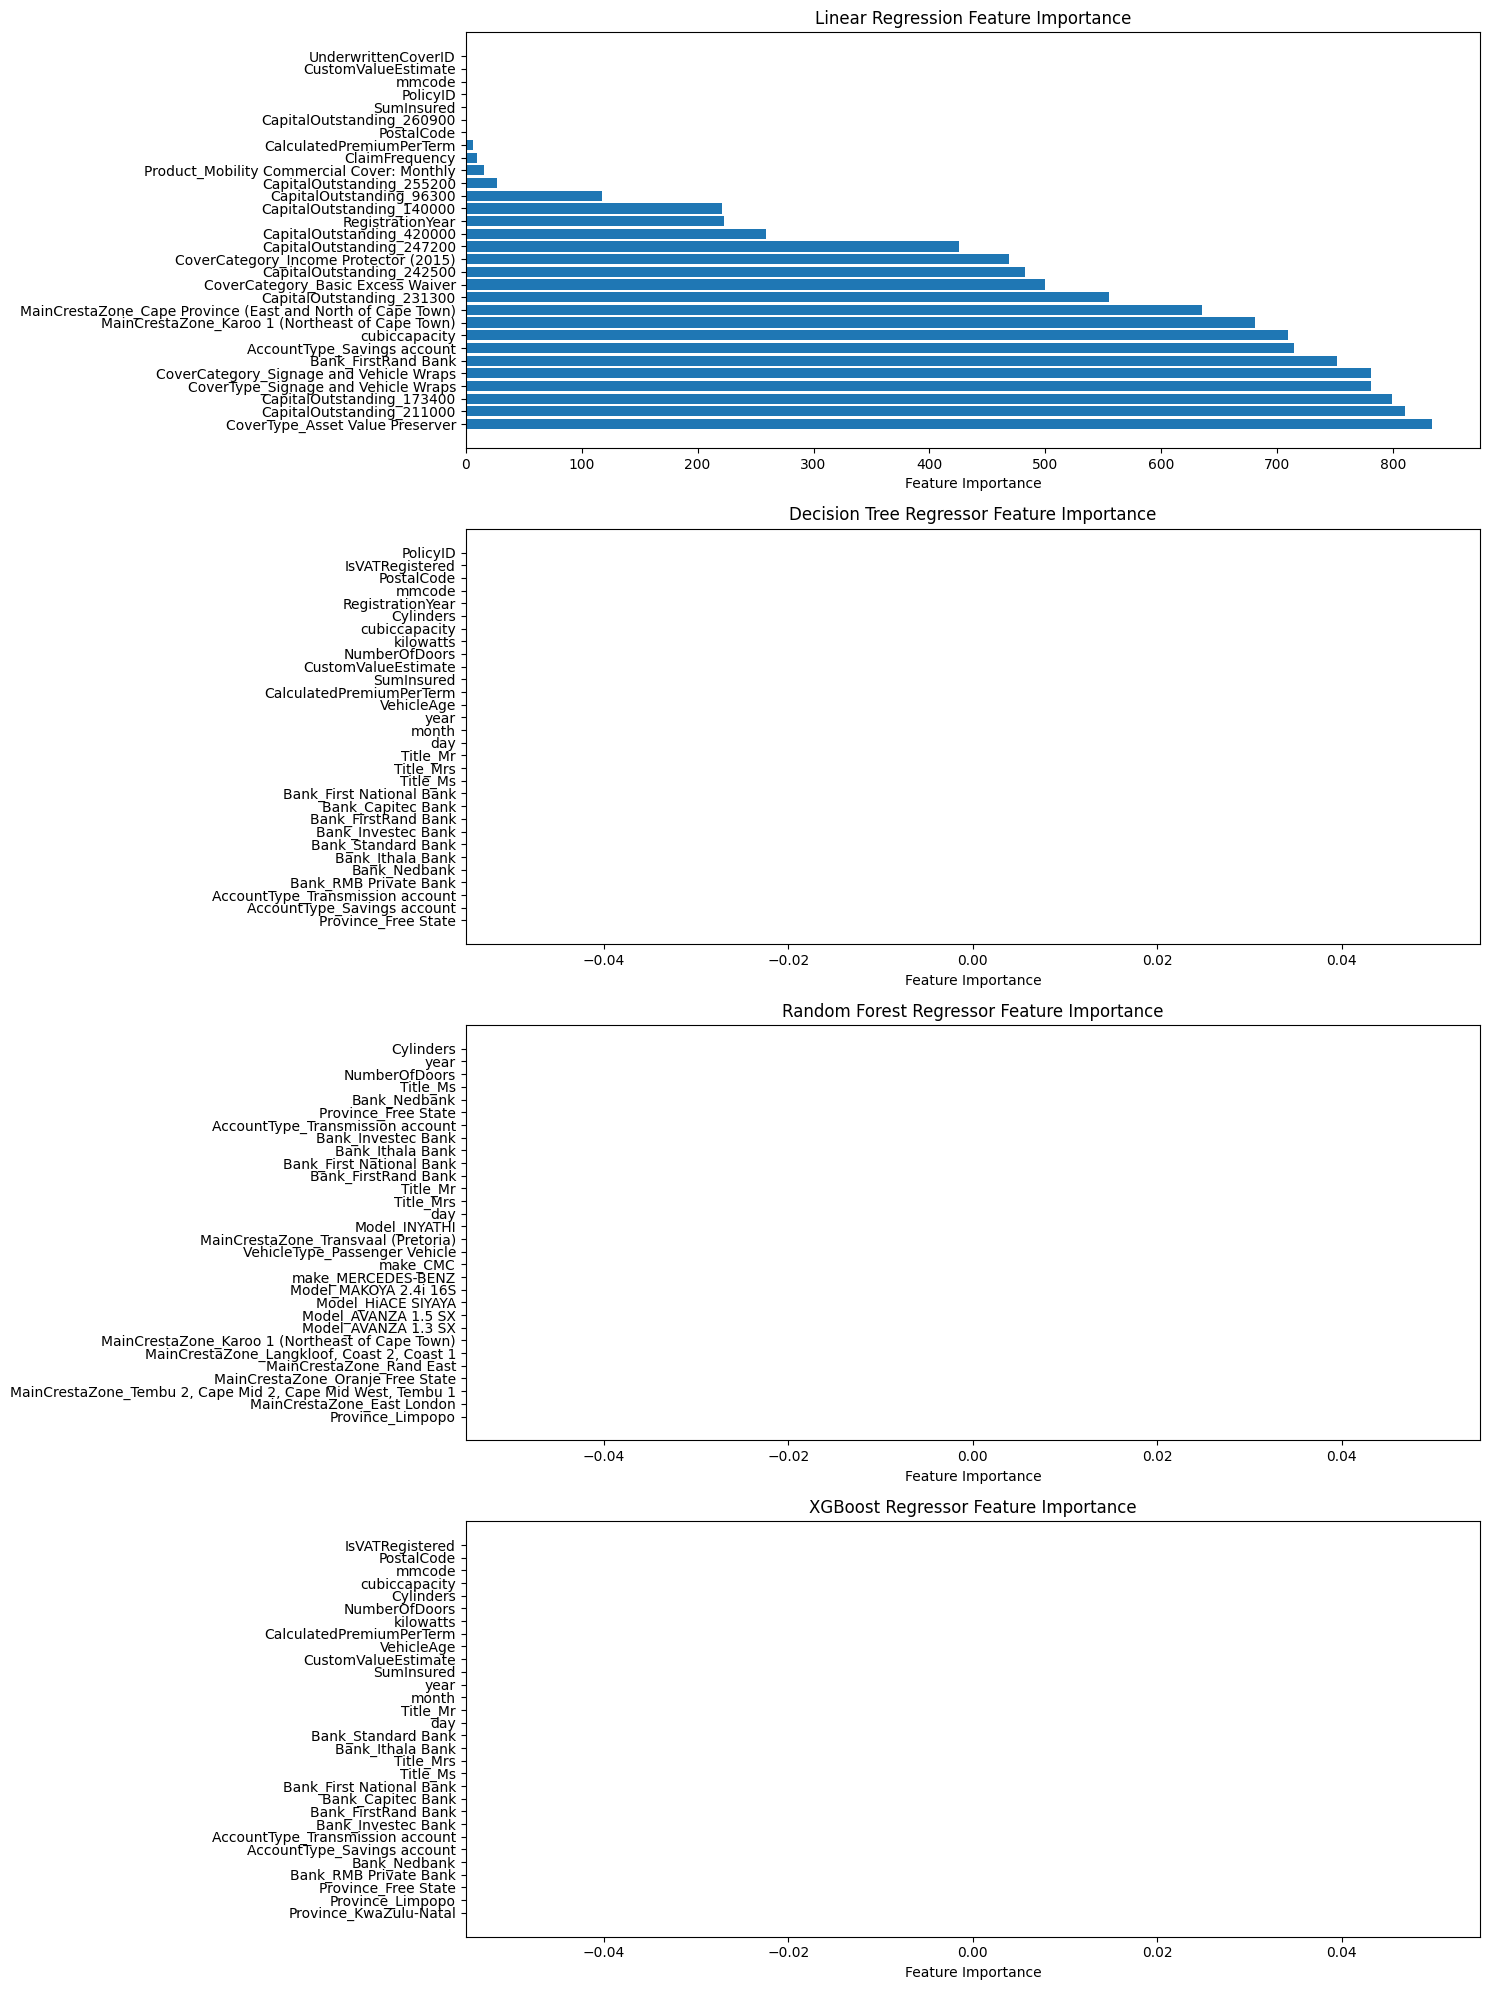

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models
models = [
    ("Linear Regression", lin_reg), 
    ("Decision Tree Regressor", dt_reg), 
    ("Random Forest Regressor", rf_reg), 
    ("XGBoost Regressor", xgb_reg)
]

# Function to plot feature importance for each model
def plot_feature_importance(models, X_train):
    # Set up the figure with one column and as many rows as there are models
    plt.figure(figsize=(15, 20))
    
    # Loop through each model
    for idx, (model_name, model) in enumerate(models, start=1):
        if hasattr(model, 'coef_'):  # Linear Regression has 'coef_' for feature importance
            importance = np.abs(model.coef_)
        elif hasattr(model, 'feature_importances_'):  # Decision Tree, Random Forest, and XGBoost
            importance = model.feature_importances_
        else:
            print(f"{model_name} does not have feature importance")
            continue
        
        # Sort feature importance and get top 30
        sorted_idx = np.argsort(importance)[1:-1]
        top_idx = sorted_idx[:30]
        top_features = X_train.columns[top_idx]
        top_importance = importance[top_idx]
        
        # Plot
        plt.subplot(len(models), 1, idx)
        plt.barh(top_features, top_importance)
        plt.xlabel('Feature Importance')
        plt.title(f'{model_name} Feature Importance')
        plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_feature_importance(models, X_train)


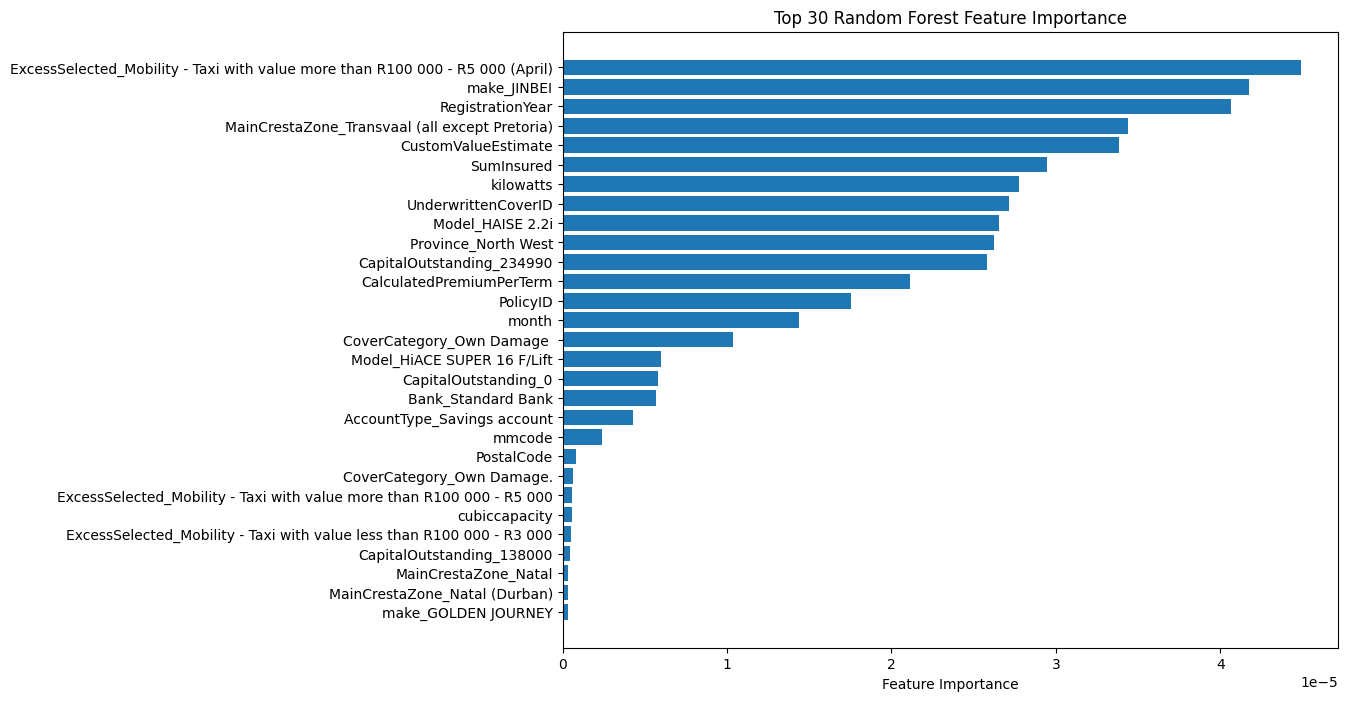

In [226]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Random Forest model
feat_importance_rf = rf_reg.feature_importances_
feat_names = X_train.columns

# Create a DataFrame for easier sorting
feature_importance_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': feat_importance_rf
})

# Sort by importance in descending order and get the top 30 features
top_30_features = feature_importance_df.sort_values(by='Importance', ascending=False)[1:30]

# Plot the top 30 features
plt.figure(figsize=(10, 8))
plt.barh(top_30_features['Feature'], top_30_features['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 30 Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


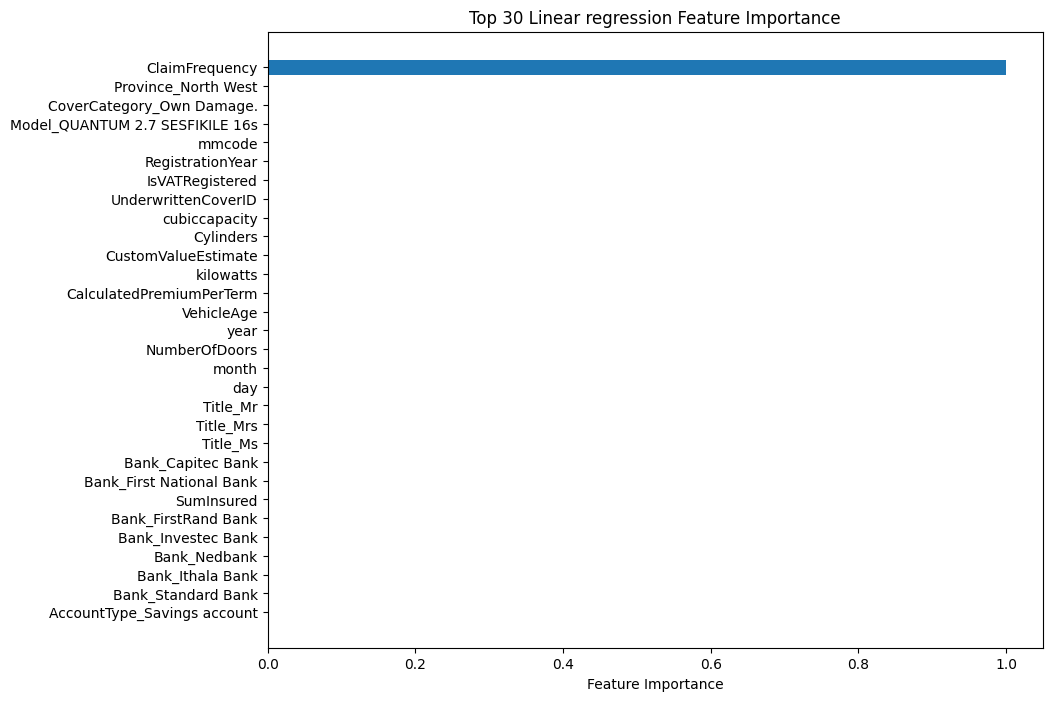

In [224]:

# Get feature importance from Random Forest model
feat_importance_rf = dt_reg.feature_importances_
feat_names = X_train.columns

# Create a DataFrame for easier sorting
feature_importance_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': feat_importance_rf
})

# Sort by importance in descending order and get the top 30 features
top_30_features = feature_importance_df.sort_values(by='Importance', ascending=False)[0:30]

# Plot the top 30 features
plt.figure(figsize=(10, 8))
plt.barh(top_30_features['Feature'], top_30_features['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 30 Linear regression Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

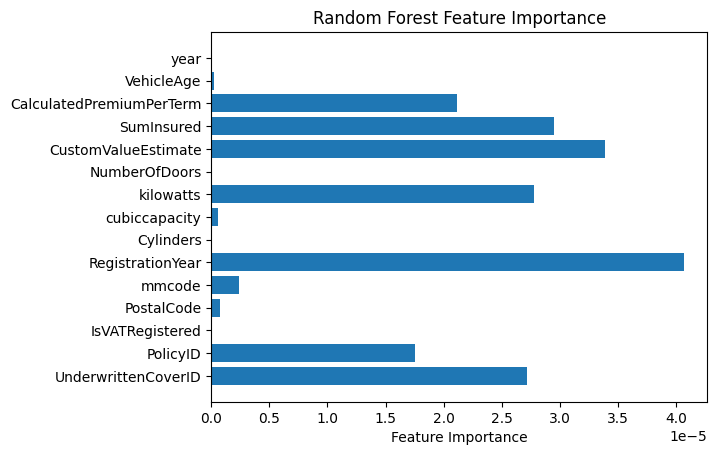

In [ ]:
import matplotlib.pyplot as plt

# Random Forest feature importance
feat_importance_rf = rf_reg.feature_importances_
feat_names = X_train.columns
plt.barh(feat_names, feat_importance_rf)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# # XGBoost feature importance
# xgb.plot_importance(xgb_reg, importance_type='weight')
# plt.show()

In [196]:
len(feat_names[:10])

10

Use SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret the model's predictions and understand how individual features influence the outcomes.

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


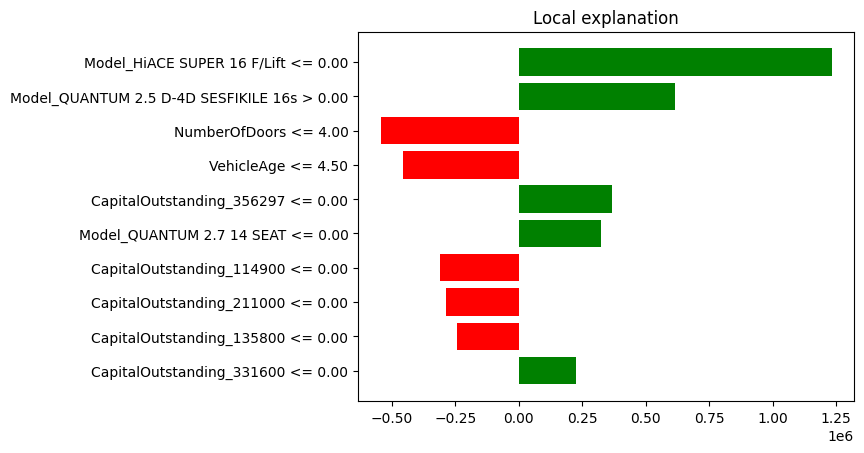

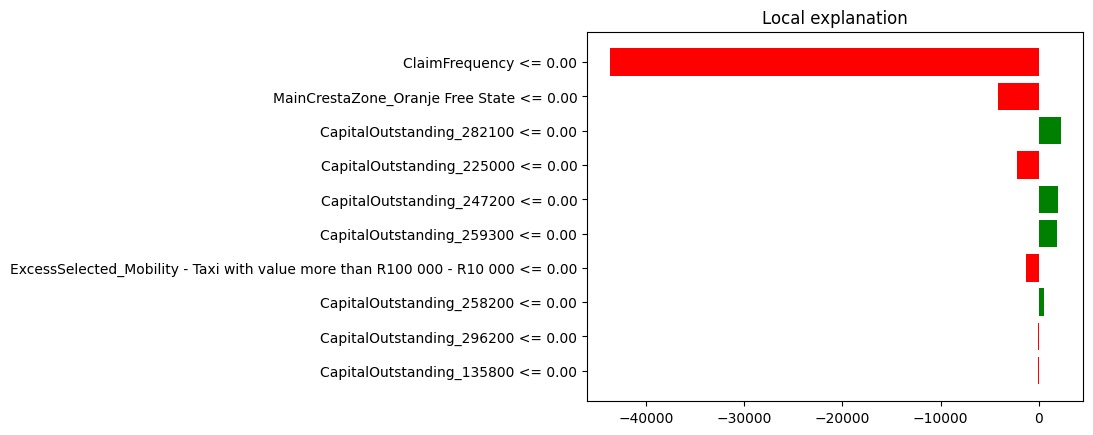

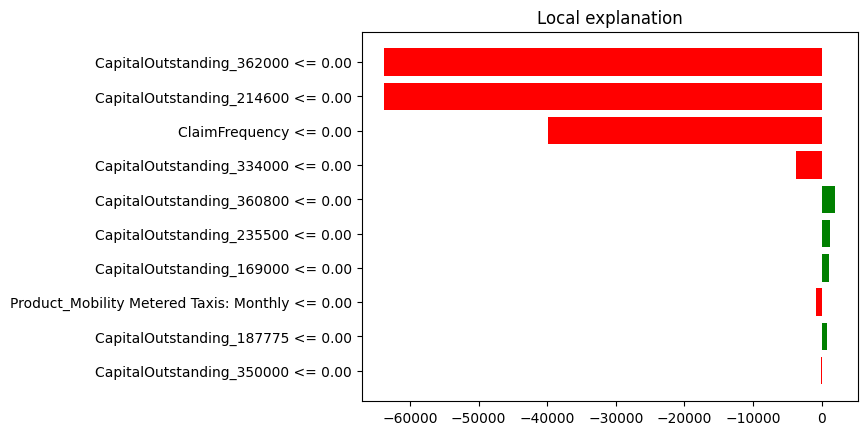

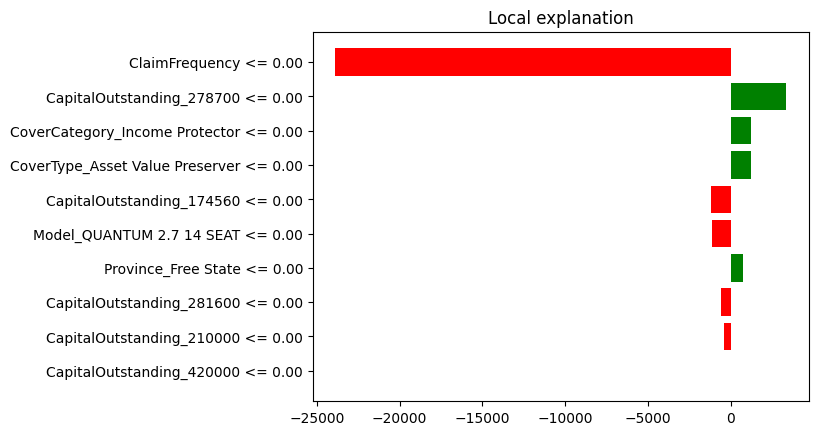

In [227]:
import lime
from lime.lime_tabular import LimeTabularExplainer

def plot_lime_explanation(model, X_train, X_test, instance_idx):
    # Check if the model is for classification or regression
    if hasattr(model, 'predict_proba'):  # Classification model
        mode = 'classification'
        predict_fn = model.predict_proba
        class_names = [str(i) for i in range(model.n_classes_)]
    else:  # Regression model (Linear Regression, Decision Tree, Random Forest, XGBoost)
        mode = 'regression'
        predict_fn = model.predict
        class_names = None  # No class names for regression
    
    # Initialize the LimeTabularExplainer
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns,
        mode=mode,  # Choose mode based on the model type
        class_names=class_names  # Only needed for classification
    )
    
    # Explain a single instance's prediction
    exp = explainer.explain_instance(X_test.iloc[instance_idx].values, predict_fn)
    
    # Plot the explanation (you can also use exp.show_in_notebook() in Jupyter)
    exp.as_pyplot_figure()

# Example usage for different models:
plot_lime_explanation(lin_reg, X_train, X_test, instance_idx=10)  # Linear Regression
plot_lime_explanation(dt_reg, X_train, X_test, instance_idx=10)  # Decision Tree
plot_lime_explanation(rf_reg, X_train, X_test, instance_idx=10)  # Random Forest
plot_lime_explanation(xgb_reg, X_train, X_test, instance_idx=10)  # XGBoost


### Reporting Comparison Between Models:
You can compare the performance of each model (Linear Regression, Decision Tree, Random Forest, XGBoost) based on their evaluation metrics (like MSE, R-squared, and MAE). A table or bar chart comparing these metrics can be useful for decision-making.

In [ ]:

model_comparison = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_xgb)],
    'R-squared': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb)],
    'MAE': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_dt), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_xgb)]
}

model_comparison_df = pd.DataFrame(model_comparison)
model_comparison_df
